# Hotel Booking Data Analysis Project Part 1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats
import seaborn as sns

In [3]:
df = pd.read_csv('DS1_C5_S5_Hotel Dataset.csv')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,68,2015,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,3,Check-Out,05-07-2015
1,Resort Hotel,0,14,2015,July,27,2,0,2,2,...,No Deposit,242.0,NaN,0,Transient,98.00,0,1,Check-Out,04-07-2015
2,Resort Hotel,0,10,2015,July,27,3,0,2,2,...,No Deposit,240.0,NaN,0,Transient,153.00,1,0,Check-Out,05-07-2015
3,Resort Hotel,0,9,2015,July,27,3,0,1,2,...,No Deposit,241.0,NaN,0,Transient,94.71,0,0,Check-Out,04-07-2015
4,Resort Hotel,0,51,2015,July,28,6,1,3,2,...,No Deposit,241.0,NaN,0,Transient,117.81,1,2,Check-Out,10-07-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2092,City Hotel,0,15,2017,August,34,25,2,2,2,...,No Deposit,14.0,NaN,0,Transient,132.53,0,2,Check-Out,29-08-2017
2093,City Hotel,0,83,2017,August,35,28,1,3,1,...,No Deposit,14.0,NaN,0,Transient,147.68,0,0,Check-Out,01-09-2017
2094,City Hotel,0,189,2017,August,35,29,0,3,2,...,No Deposit,42.0,NaN,0,Transient,80.10,0,1,Check-Out,01-09-2017
2095,City Hotel,0,147,2017,August,35,28,1,5,2,...,No Deposit,14.0,NaN,0,Transient,117.00,0,1,Check-Out,03-09-2017


In [4]:
df.isnull().sum()

hotel                                0
is_canceled                          0
lead_time                            0
arrival_date_year                    0
arrival_date_month                   0
arrival_date_week_number             0
arrival_date_day_of_month            0
stays_in_weekend_nights              0
stays_in_week_nights                 0
adults                               0
children                             0
babies                               0
meal                                 0
country                              0
market_segment                       0
distribution_channel                 0
is_repeated_guest                    0
previous_cancellations               0
previous_bookings_not_canceled       0
reserved_room_type                   0
assigned_room_type                   0
booking_changes                      0
deposit_type                         0
agent                              127
company                           2066
days_in_waiting_list     

# TASK 1: Data Cleaning

In [5]:
mean_valves = df['agent'].mean()
df['agent']= df['agent'].fillna(mean_valves)

In [6]:
mean_valves = df['company'].mean()
df['company']= df['company'].fillna(mean_valves)

In [7]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [8]:
#Interpretation:All Missing values are treated and imputed by the mean value.

# TASK 2: Booking Pattern Analysis

In [9]:
#1.what are the peak booking periods for the hotel.

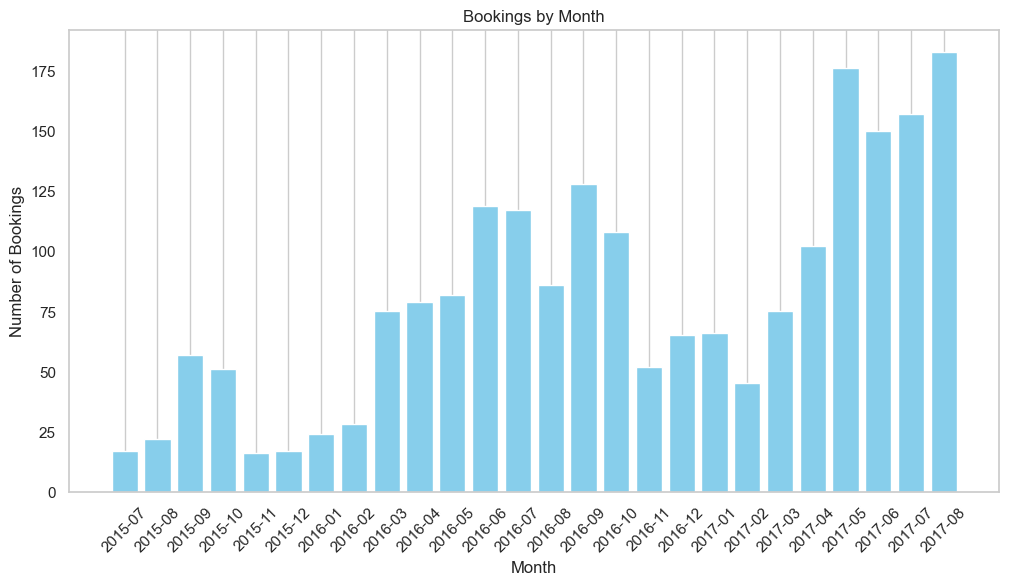

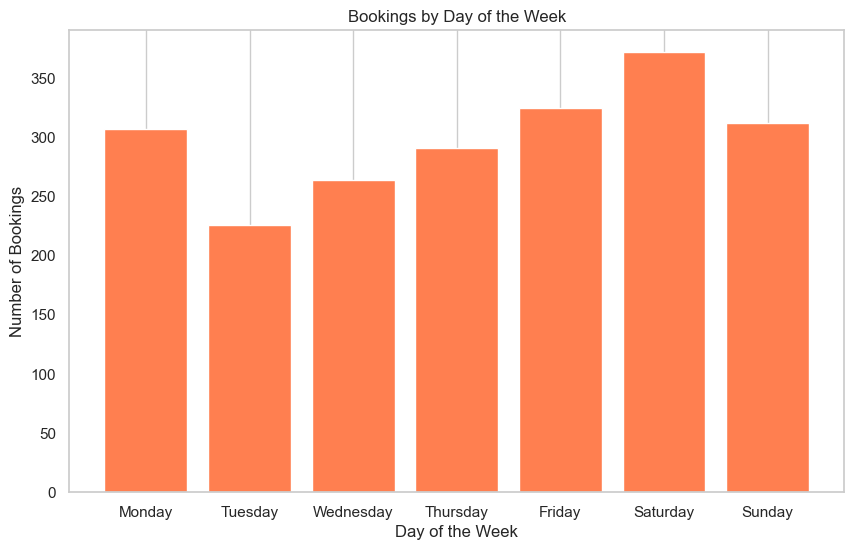

In [106]:
# Convert arrival_date to datetime for accurate extraction
df['arrival_date'] = pd.to_datetime(df[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']].astype(str).agg('-'.join, axis=1), format='%Y-%B-%d')

# Extract month and day of the week
df['month'] = df['arrival_date'].dt.to_period('M')
df['day_of_week'] = df['arrival_date'].dt.day_name()

# Drop rows with missing arrival dates
df_clean = df.dropna(subset=['arrival_date'])

# Count bookings by month
monthly_bookings = df_clean['month'].value_counts().sort_index().reset_index()
monthly_bookings.columns = ['Month', 'Number of Bookings']

# Count bookings by day of the week
daily_bookings = df_clean['day_of_week'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()
daily_bookings.columns = ['Day of the Week', 'Number of Bookings']

# Plot bookings by month
plt.figure(figsize=(12, 6))
plt.bar(monthly_bookings['Month'].astype(str), monthly_bookings['Number of Bookings'], color='skyblue')
plt.title('Bookings by Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Plot bookings by day of the week
plt.figure(figsize=(10, 6))
plt.bar(daily_bookings['Day of the Week'], daily_bookings['Number of Bookings'], color='coral')
plt.title('Bookings by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Bookings')
plt.grid(axis='y')
plt.show()


In [56]:
#2.#is there a relationship between lead time and the likelihood of a booking being cancelled?

In [57]:
# Calculate correlation
correlation = df['lead_time'].corr(df['is_canceled'])
print(f"Correlation between Lead Time and Cancellation: {correlation}")


Correlation between Lead Time and Cancellation: 0.13992582707201962


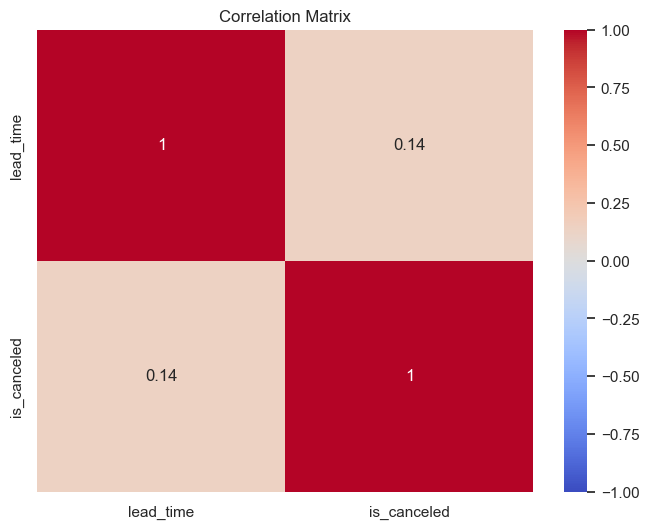

In [58]:
corr_matrix = df[['lead_time','is_canceled']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix')
plt.show()

In [59]:
#3.How do booking patterns vary by month, week, and day of the week.

In [60]:
# Extract month, week, and day of the week
df['month'] = df['arrival_date'].dt.to_period('M')
df['week'] = df['arrival_date'].dt.to_period('W')
df['day_of_week'] = df['arrival_date'].dt.day_name()

# Drop rows with missing arrival dates
df_clean = df.dropna(subset=['arrival_date'])

In [61]:
# Count bookings by month
monthly_bookings = df_clean['month'].value_counts().sort_index().reset_index()
monthly_bookings.columns = ['Month', 'Number of Bookings']

# Count bookings by week
weekly_bookings = df_clean['week'].value_counts().sort_index().reset_index()
weekly_bookings.columns = ['Week', 'Number of Bookings']

# Count bookings by day of the week
daily_bookings = df_clean['day_of_week'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()
daily_bookings.columns = ['Day of the Week', 'Number of Bookings']


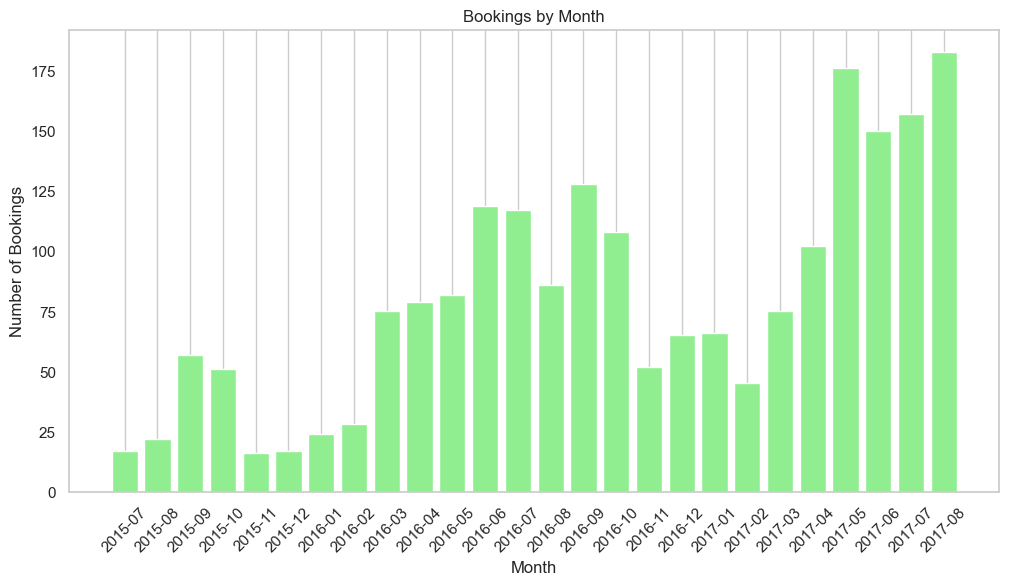

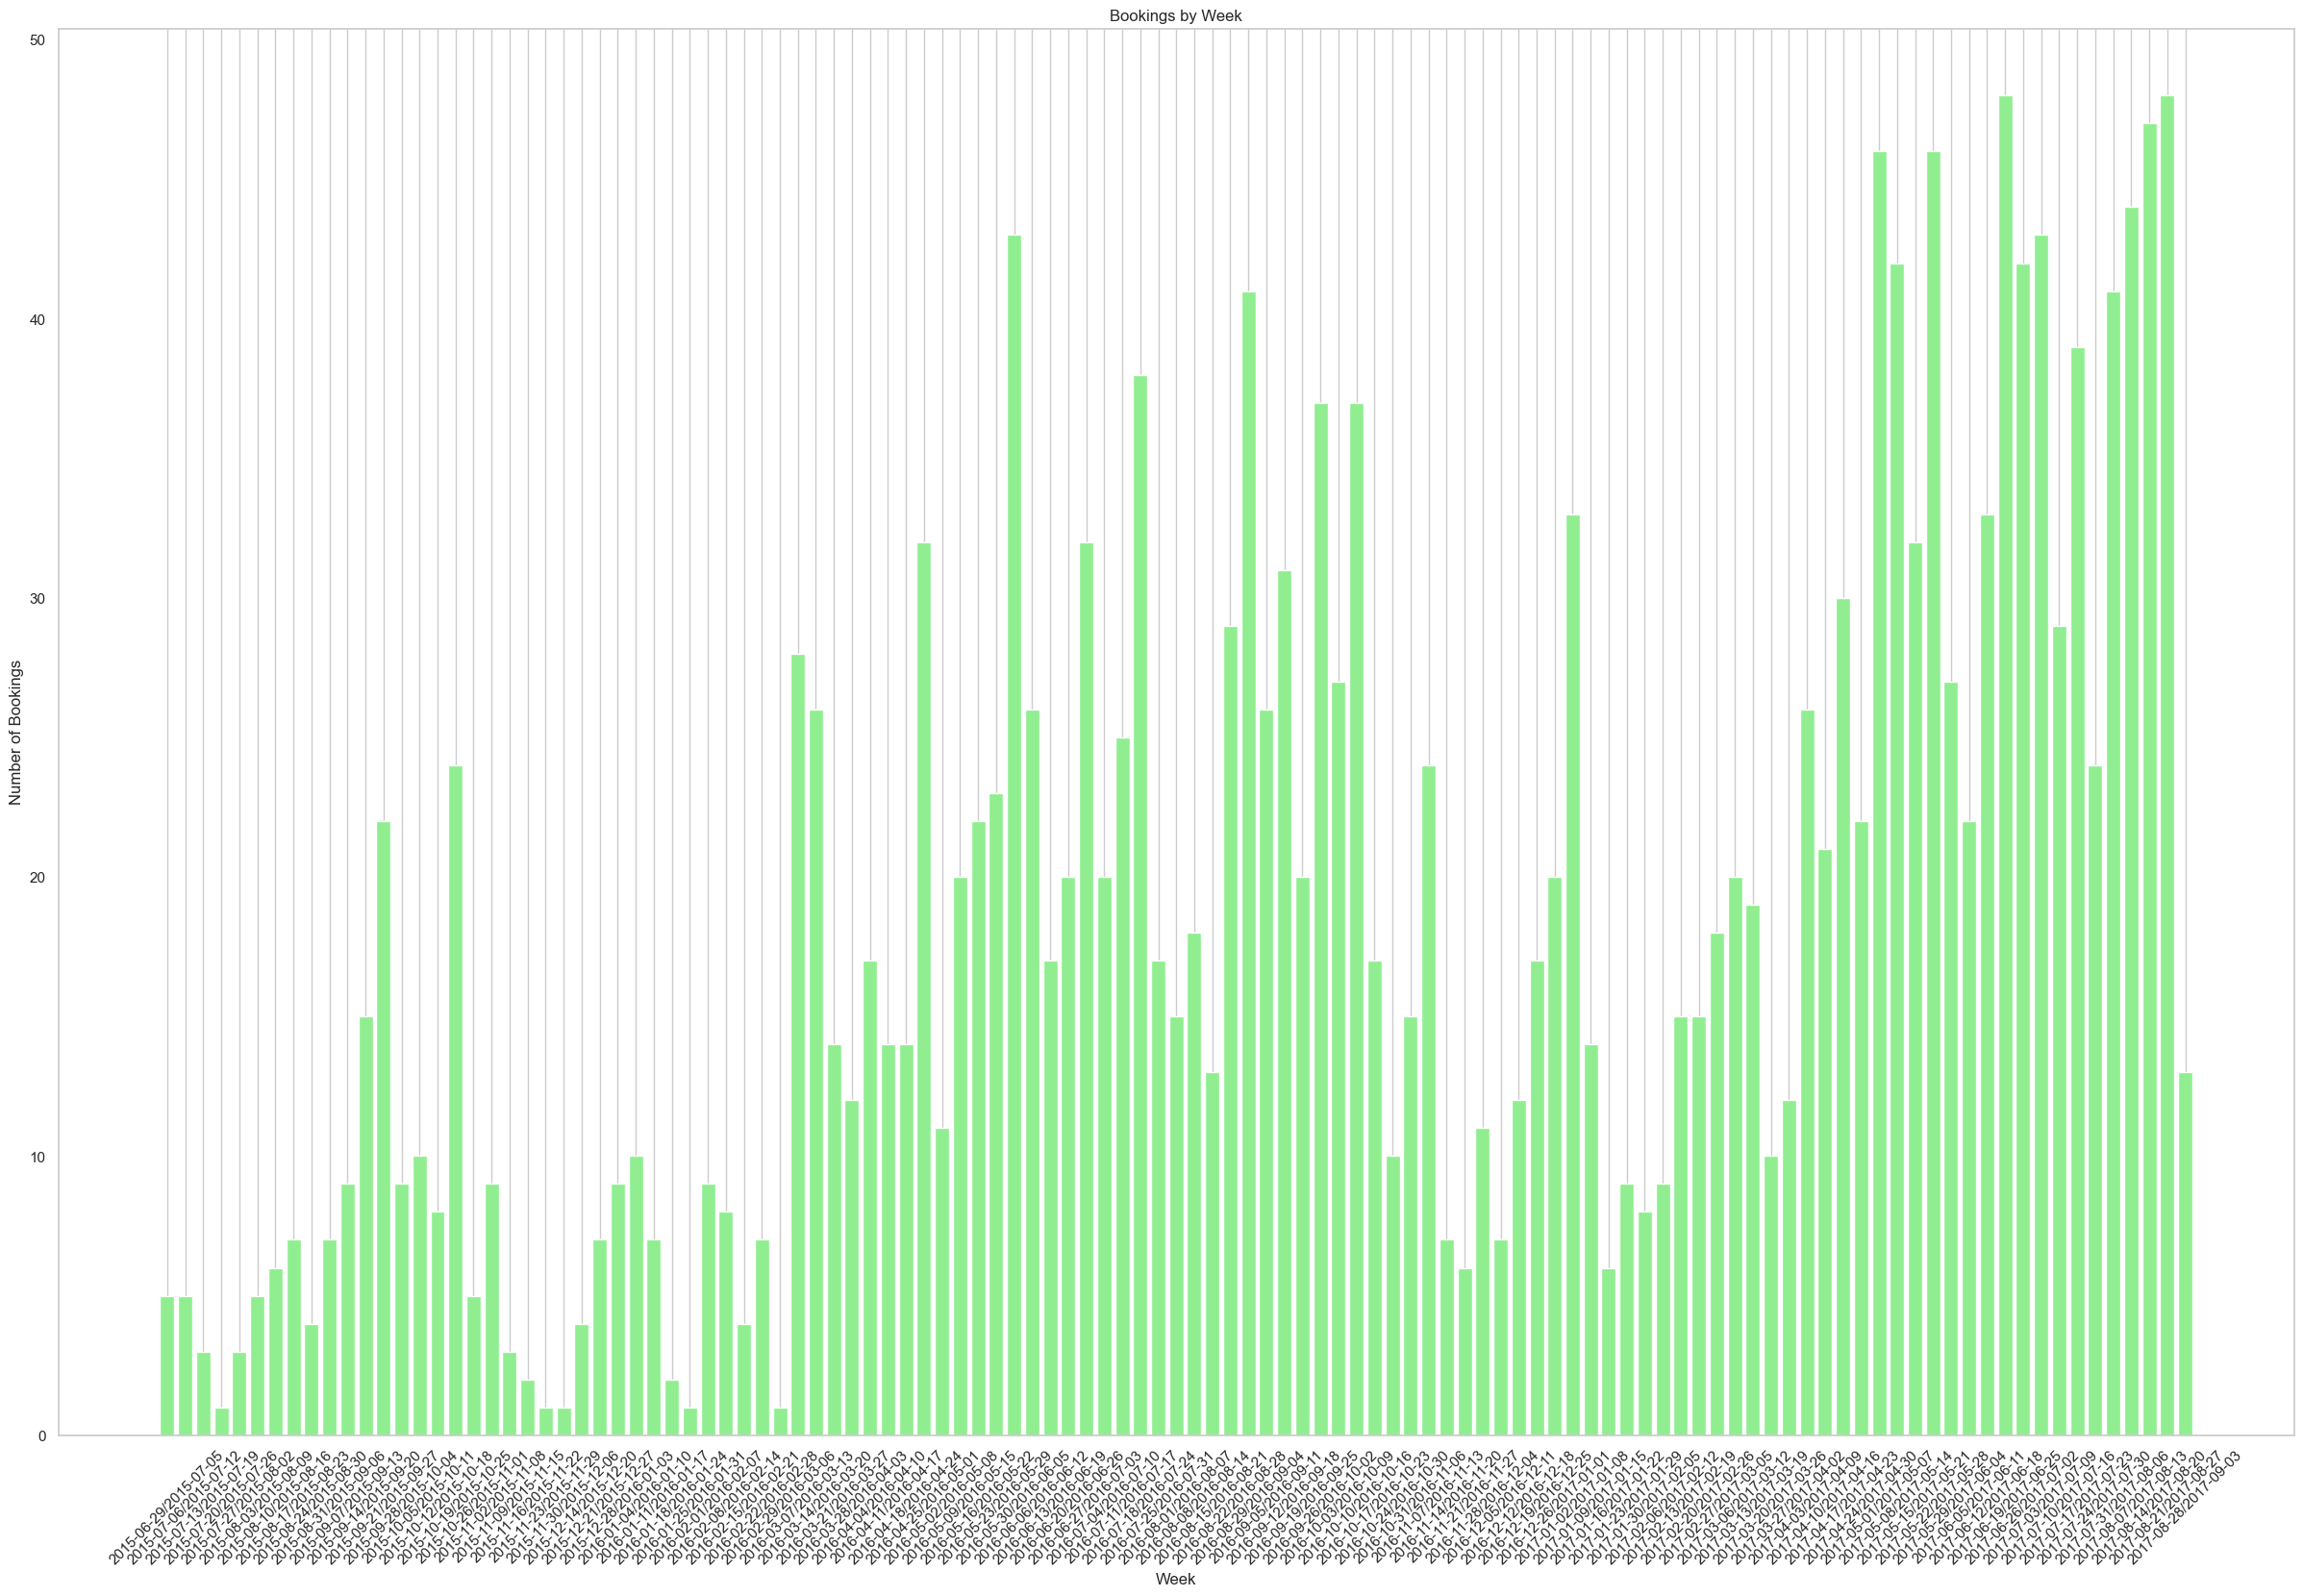

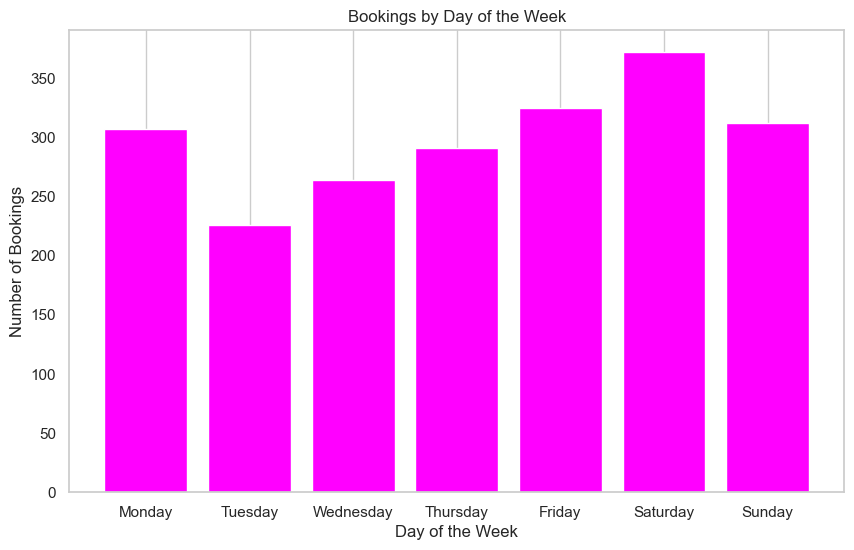

In [62]:
# Plot bookings by month
plt.figure(figsize=(12, 6))
plt.bar(monthly_bookings['Month'].astype(str), monthly_bookings['Number of Bookings'], color='lightgreen')
plt.title('Bookings by Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Plot bookings by week
plt.figure(figsize=(30, 19))
plt.bar(weekly_bookings['Week'].astype(str), weekly_bookings['Number of Bookings'], color='lightgreen')
plt.title('Bookings by Week')
plt.xlabel('Week')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Plot bookings by day of the week
plt.figure(figsize=(10, 6))
plt.bar(daily_bookings['Day of the Week'], daily_bookings['Number of Bookings'], color='magenta')
plt.title('Bookings by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Bookings')
plt.grid(axis='y')
plt.show()


# TASK 3: Booking Cancellation Analysis

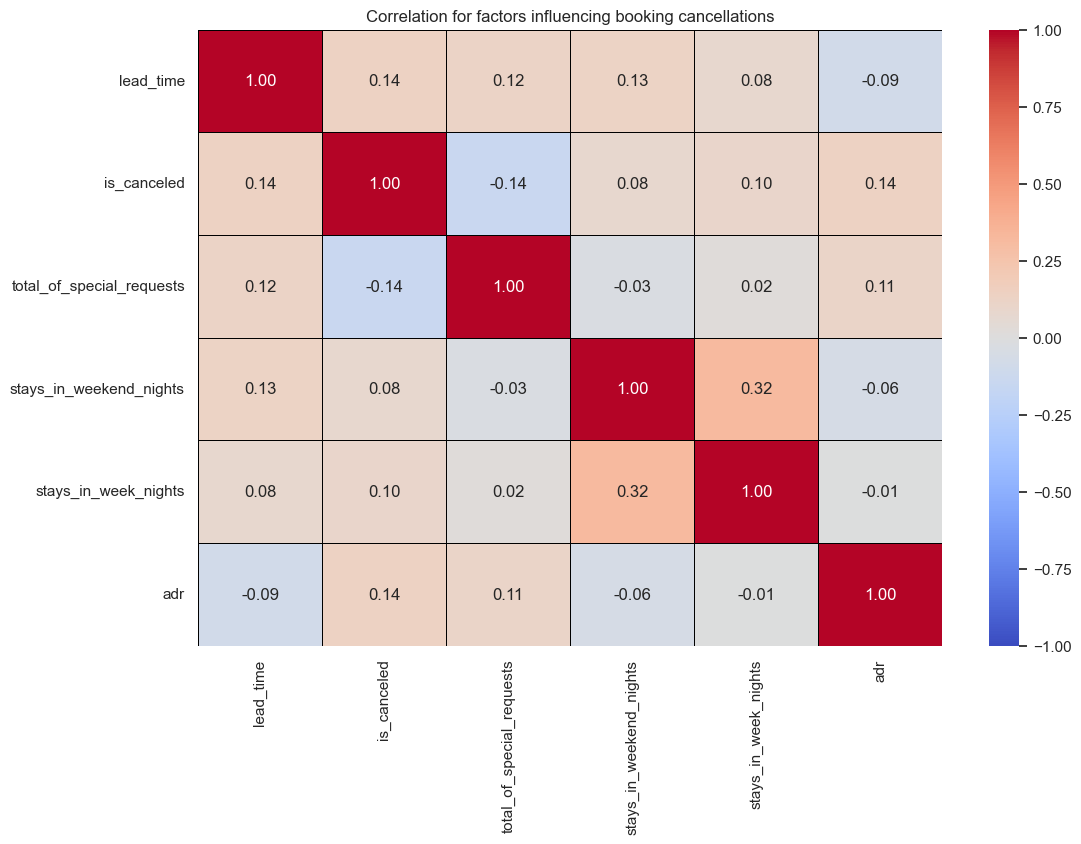

In [63]:
numerical_df = df[['lead_time', 'is_canceled', 'total_of_special_requests',
                   'stays_in_weekend_nights', 'stays_in_week_nights', 'adr']].dropna()

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0,
            linewidths=0.5, linecolor='black')
plt.title('Correlation for factors influencing booking cancellations')
plt.show()


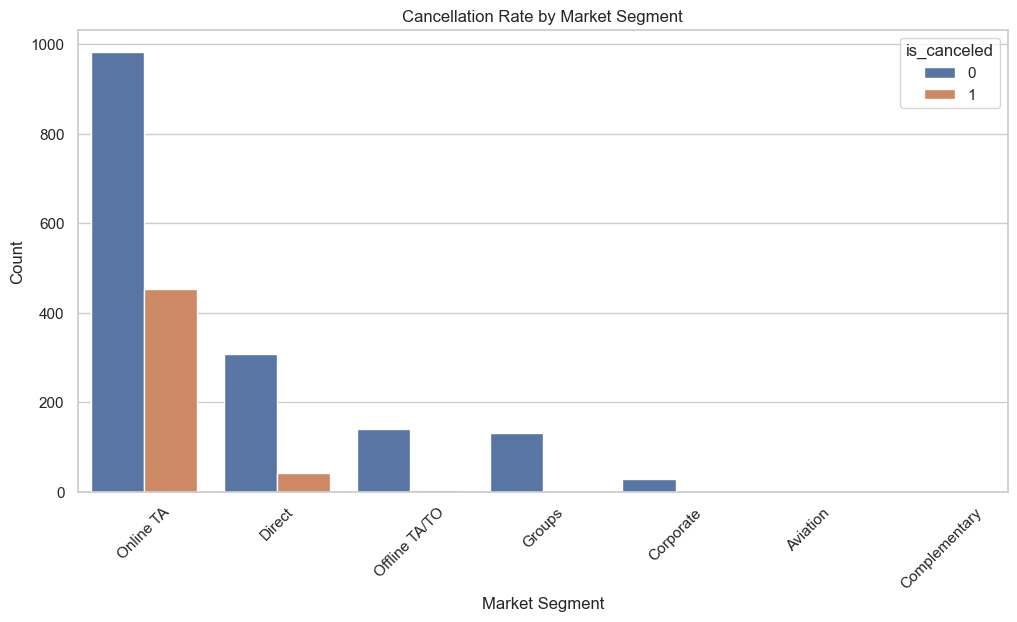

In [64]:
# Plot cancellation rates by market segment
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='market_segment', hue='is_canceled', order=df['market_segment'].value_counts().index)
plt.title('Cancellation Rate by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [65]:
#2.Are there specific trends or patterns in cancellations over time?

In [66]:
# Extract month, week, and day of the week
df['month'] = df['arrival_date'].dt.to_period('M')
df['day_of_week'] = df['arrival_date'].dt.day_name()

# Create a 'is_canceled' column if it’s not already numeric
df['is_canceled'] = pd.to_numeric(df['is_canceled'], errors='coerce')

# Drop rows with missing arrival dates or cancellation status
df_clean = df.dropna(subset=['arrival_date', 'is_canceled'])


In [67]:
# Count cancellations by month
monthly_cancellations = df_clean[df_clean['is_canceled'] == 1]['month'].value_counts().sort_index().reset_index()
monthly_cancellations.columns = ['Month', 'Number of Cancellations']

# Count cancellations by day of the week
daily_cancellations = df_clean[df_clean['is_canceled'] == 1]['day_of_week'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()
daily_cancellations.columns = ['Day of the Week', 'Number of Cancellations']


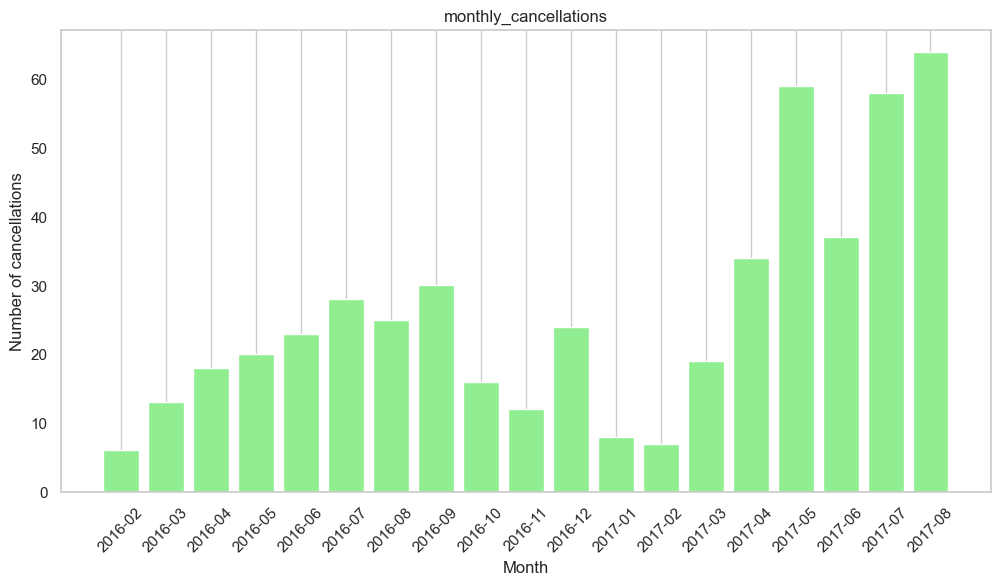

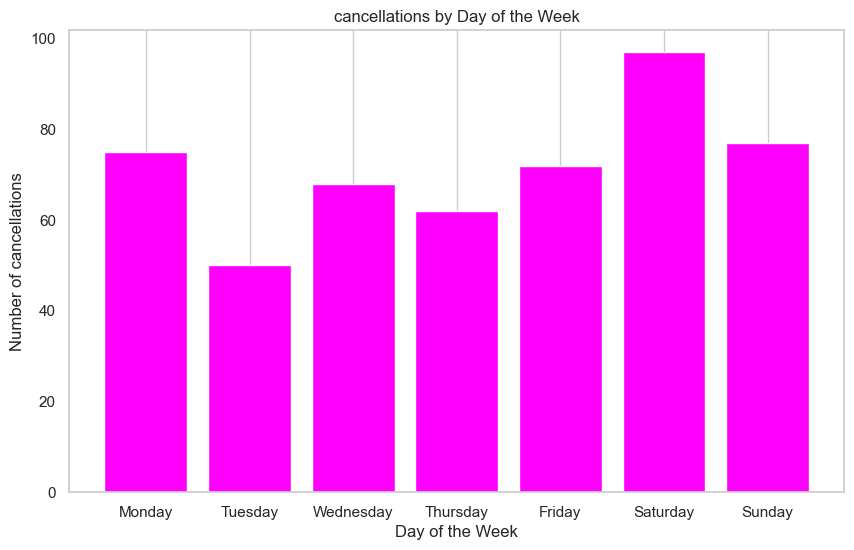

In [68]:
# Plot bookings by month
plt.figure(figsize=(12, 6))
plt.bar(monthly_cancellations['Month'].astype(str), monthly_cancellations['Number of Cancellations'], color='lightgreen')
plt.title('monthly_cancellations')
plt.xlabel('Month')
plt.ylabel('Number of cancellations')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Plot bookings by day of the week
plt.figure(figsize=(10, 6))
plt.bar(daily_cancellations['Day of the Week'], daily_cancellations['Number of Cancellations'], color='magenta')
plt.title('cancellations by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of cancellations')
plt.grid(axis='y')
plt.show()

In [69]:
#3.Can we identify high-risk bookings that are more likely to be canceled?

In [70]:
# Convert columns to numeric and handle missing values
df['is_canceled'] = pd.to_numeric(df['is_canceled'], errors='coerce')
df = df.dropna(subset=['is_canceled'])

# Filter canceled bookings
canceled_bookings = df[df['is_canceled'] == 1]


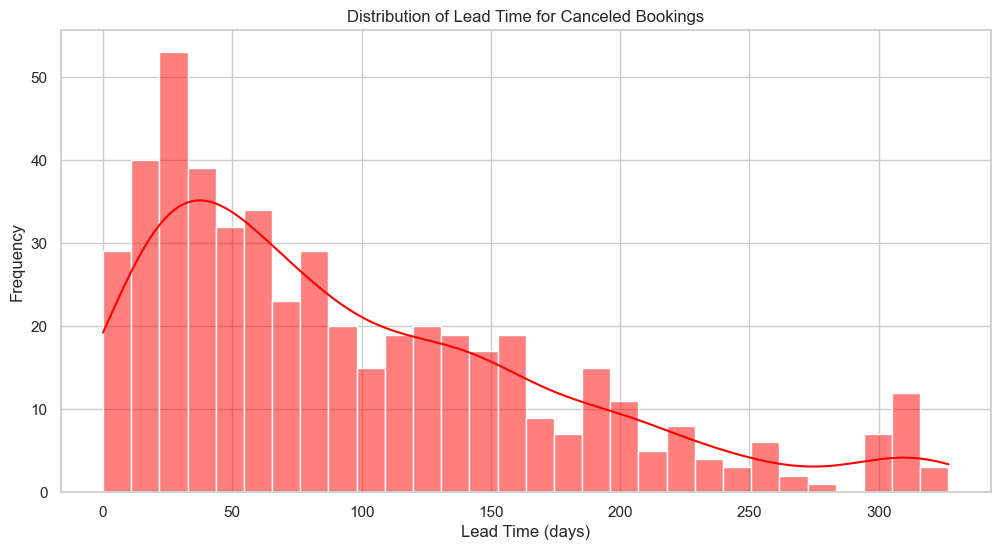

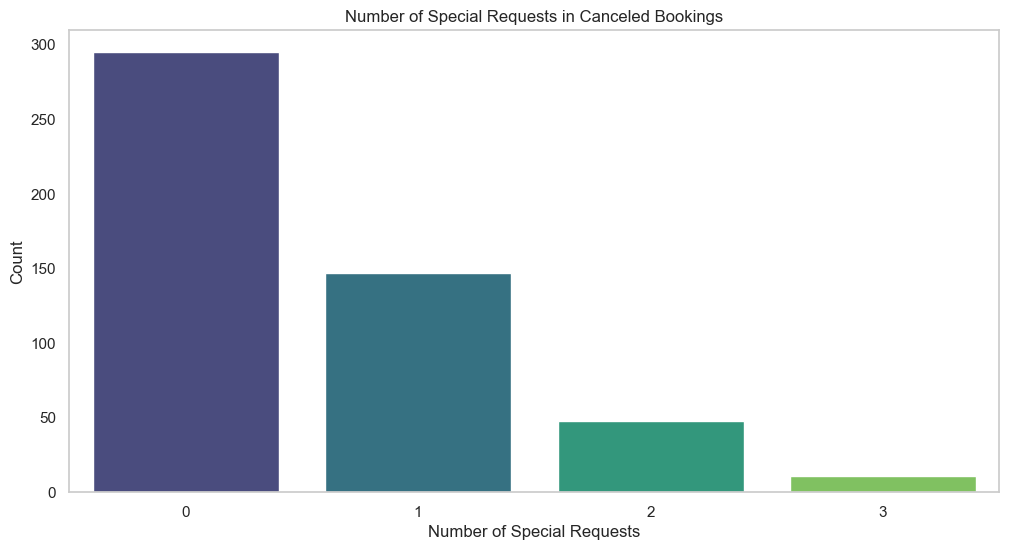

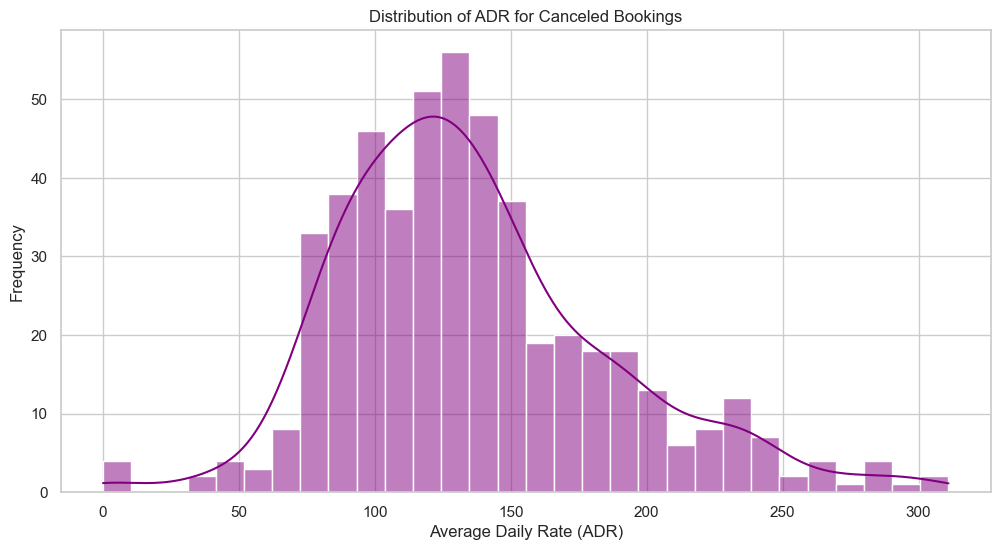

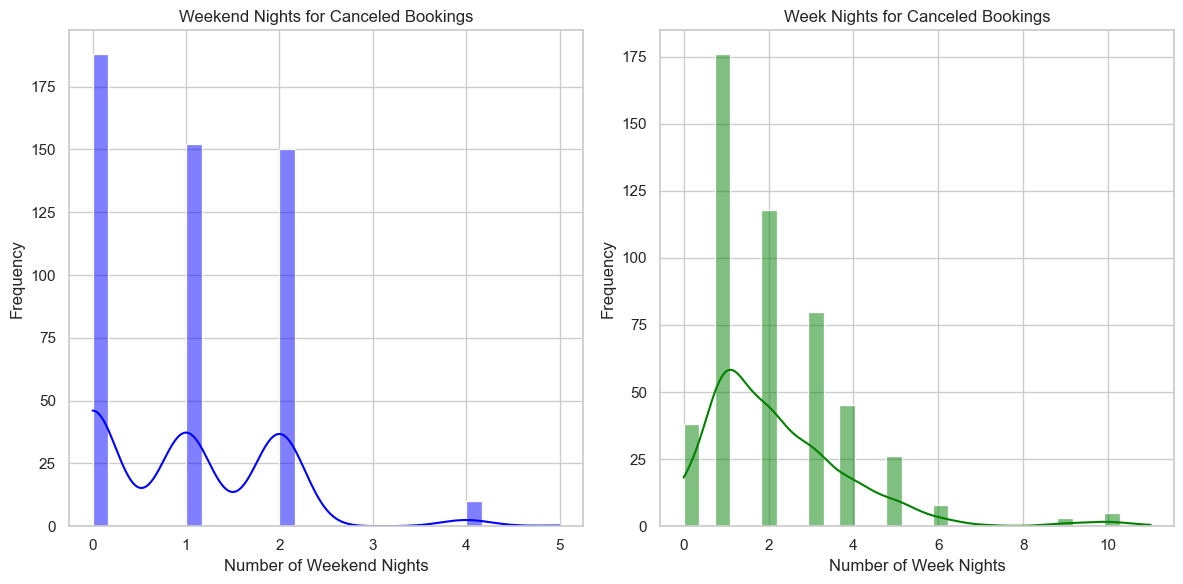

In [71]:

# Analyze lead time for canceled bookings
plt.figure(figsize=(12, 6))
sns.histplot(canceled_bookings['lead_time'], bins=30, kde=True, color='red')
plt.title('Distribution of Lead Time for Canceled Bookings')
plt.xlabel('Lead Time (days)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Analyze special requests for canceled bookings
plt.figure(figsize=(12, 6))
sns.countplot(x='total_of_special_requests', data=canceled_bookings, palette='viridis')
plt.title('Number of Special Requests in Canceled Bookings')
plt.xlabel('Number of Special Requests')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

# Analyze ADR for canceled bookings
plt.figure(figsize=(12, 6))
sns.histplot(canceled_bookings['adr'], bins=30, kde=True, color='purple')
plt.title('Distribution of ADR for Canceled Bookings')
plt.xlabel('Average Daily Rate (ADR)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Analyze stay duration (weekend and week nights) for canceled bookings
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(canceled_bookings['stays_in_weekend_nights'], bins=30, kde=True, color='blue')
plt.title('Weekend Nights for Canceled Bookings')
plt.xlabel('Number of Weekend Nights')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.histplot(canceled_bookings['stays_in_week_nights'], bins=30, kde=True, color='green')
plt.title('Week Nights for Canceled Bookings')
plt.xlabel('Number of Week Nights')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()


# TASK 4 : Customer Behavioral Segmentation

#1.Are there distinct patterns in the lead time, special requests, or room prefferences for different customer segments.

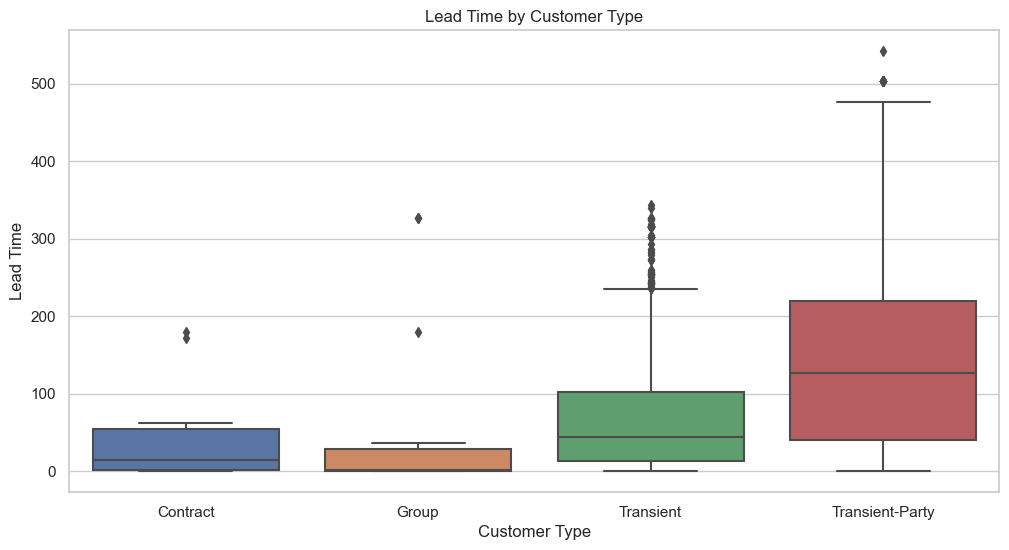

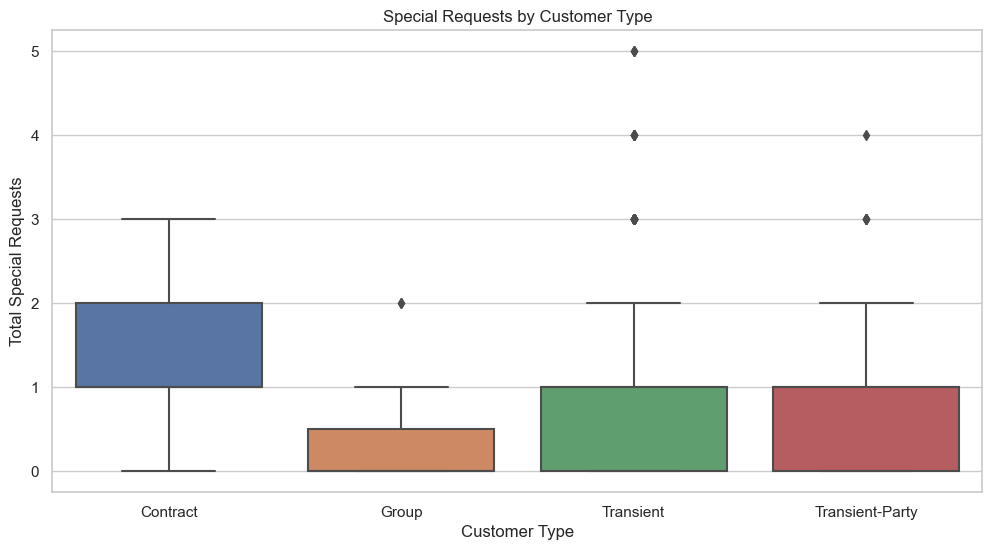

<Figure size 1400x800 with 0 Axes>

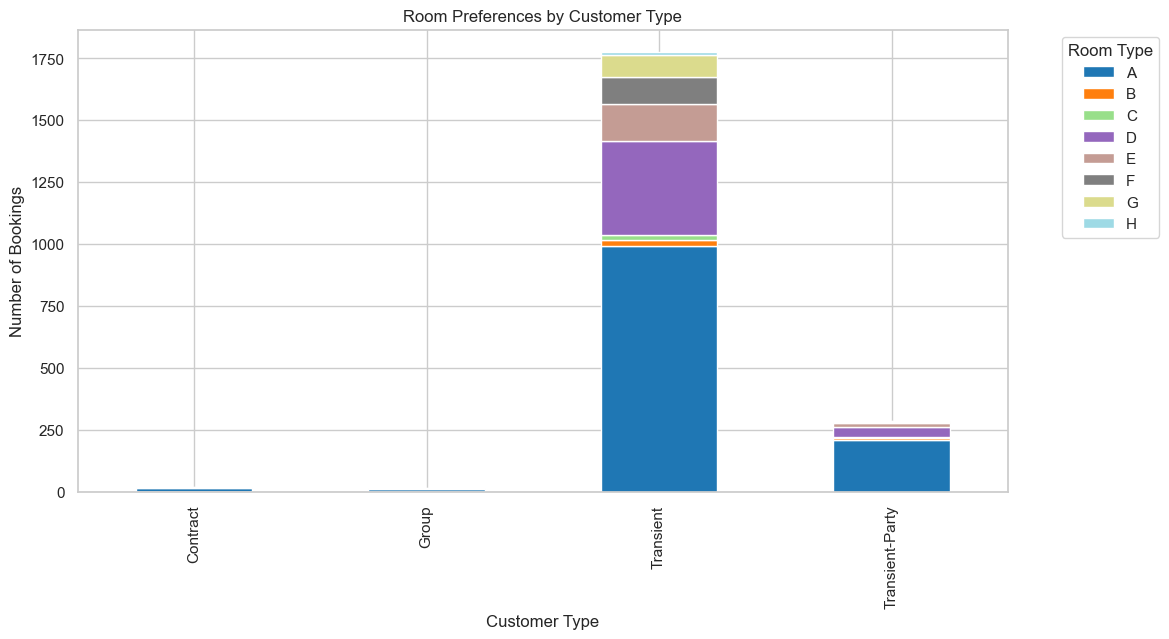

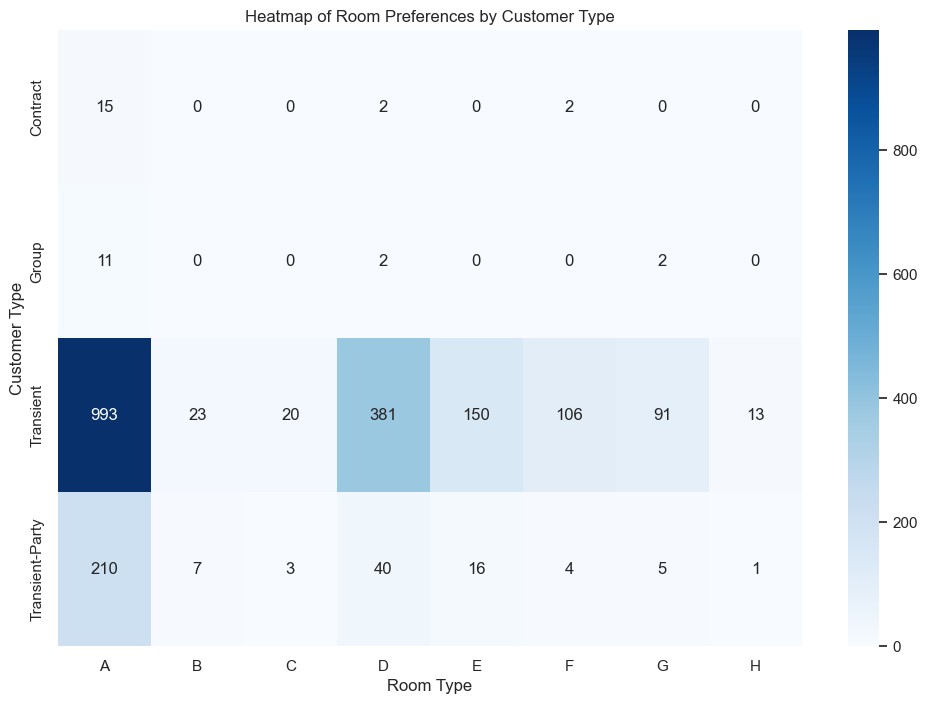

In [72]:
# Clean and preprocess data
# Convert 'adr' to numeric, handling any non-numeric values
df['adr'] = pd.to_numeric(df['adr'], errors='coerce')

# Ensure 'customer_type', 'lead_time', 'total_of_special_requests', and 'reserved_room_type' are properly formatted
df['customer_type'] = df['customer_type'].astype('category')
df['lead_time'] = pd.to_numeric(df['lead_time'], errors='coerce')
df['total_of_special_requests'] = pd.to_numeric(df['total_of_special_requests'], errors='coerce')

# Set up plotting style
sns.set(style="whitegrid")

# Analyze Lead Time by Customer Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='customer_type', y='lead_time', data=df)
plt.title('Lead Time by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Lead Time')
plt.show()

# Analyze Special Requests by Customer Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='customer_type', y='total_of_special_requests', data=df)
plt.title('Special Requests by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Total Special Requests')
plt.show()

# Analyze Room Preferences by Customer Type
# Count the number of reservations per room type for each customer type
room_preferences = df.groupby(['customer_type', 'reserved_room_type']).size().unstack().fillna(0)

# Plot Room Preferences
plt.figure(figsize=(14, 8))
room_preferences.plot(kind='bar', stacked=True, colormap='tab20', figsize=(12, 6))
plt.title('Room Preferences by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Number of Bookings')
plt.legend(title='Room Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Optional: Heatmap of Room Preferences by Customer Type
plt.figure(figsize=(12, 8))
sns.heatmap(room_preferences, annot=True, cmap='Blues', fmt='g')
plt.title('Heatmap of Room Preferences by Customer Type')
plt.xlabel('Room Type')
plt.ylabel('Customer Type')
plt.show()


<Figure size 1400x800 with 0 Axes>

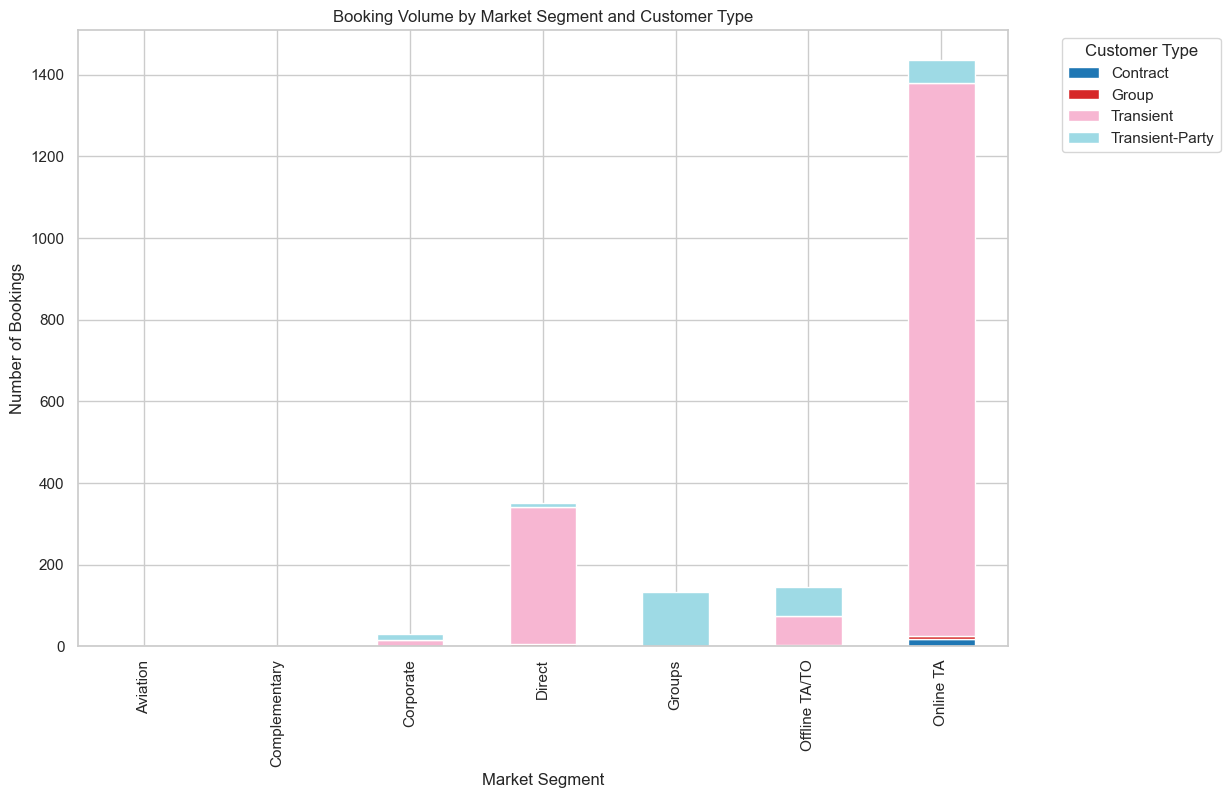

<Figure size 1400x800 with 0 Axes>

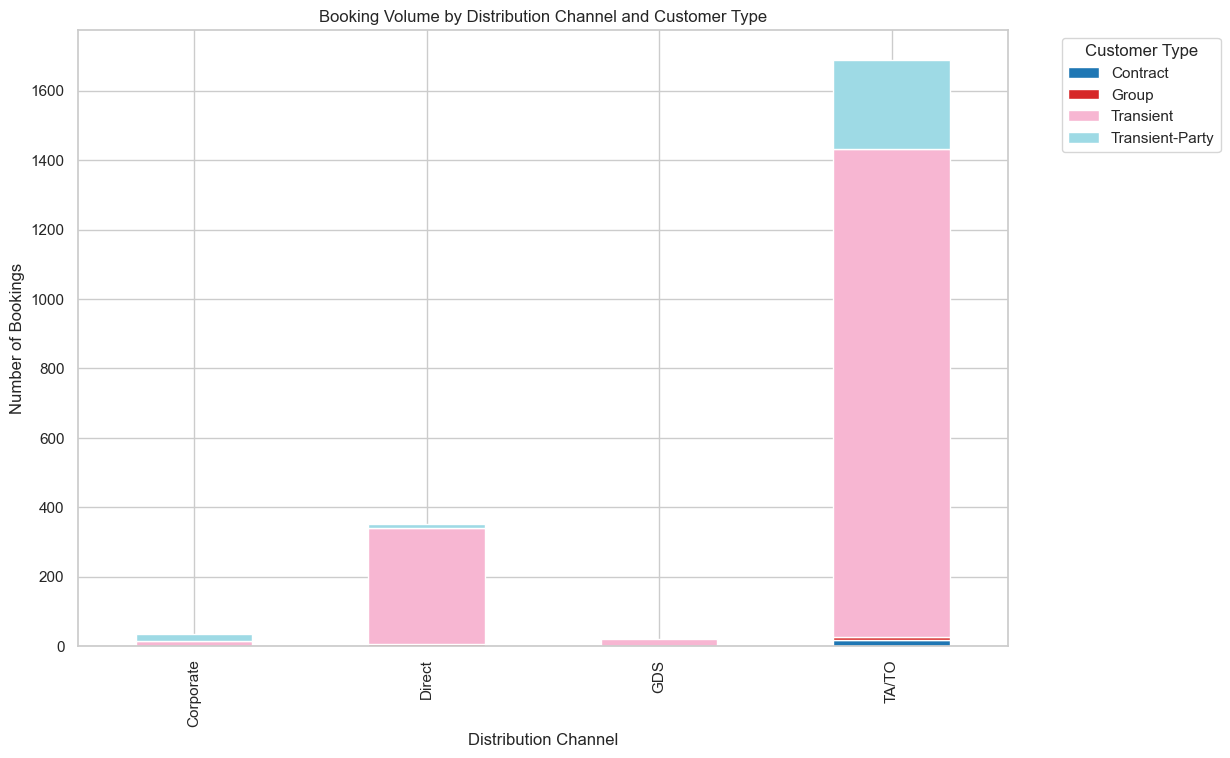

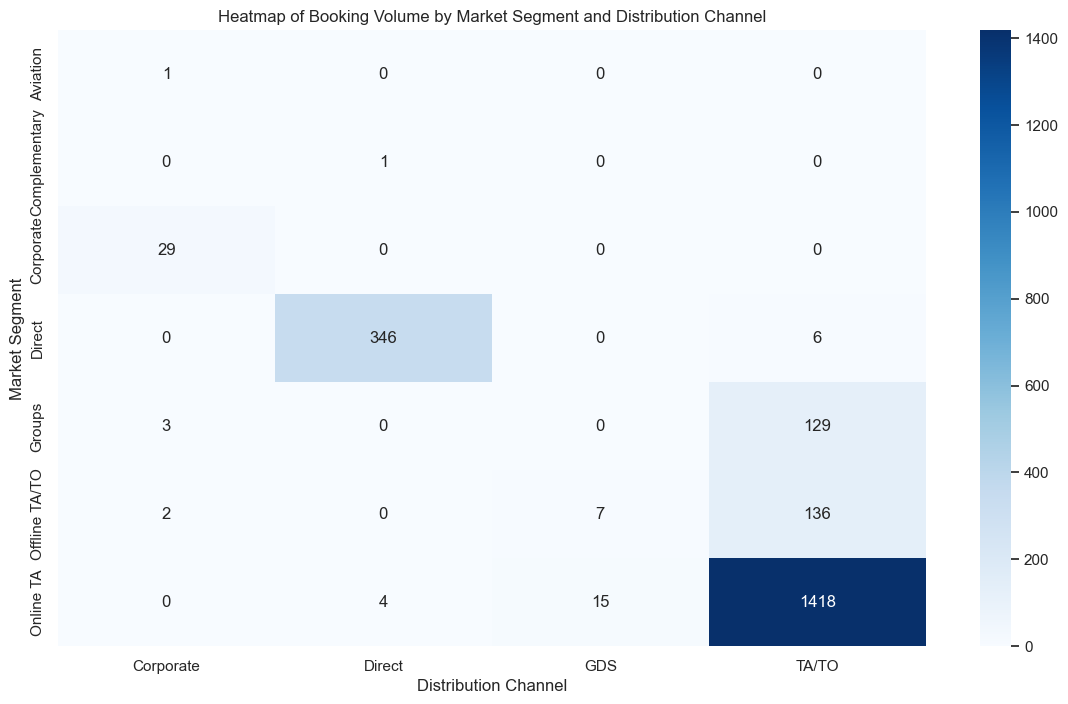

In [73]:
# Clean and preprocess data
# Ensure 'customer_type', 'market_segment', and 'distribution_channel' are properly formatted
df['customer_type'] = df['customer_type'].astype('category')
df['market_segment'] = df['market_segment'].astype('category')
df['distribution_channel'] = df['distribution_channel'].astype('category')

# Booking Volume by Market Segment and Customer Type
market_segment_customer_type = df.groupby(['market_segment', 'customer_type']).size().unstack().fillna(0)

# Plot Booking Volume by Market Segment and Customer Type
plt.figure(figsize=(14, 8))
market_segment_customer_type.plot(kind='bar', stacked=True, colormap='tab20', figsize=(12, 8))
plt.title('Booking Volume by Market Segment and Customer Type')
plt.xlabel('Market Segment')
plt.ylabel('Number of Bookings')
plt.legend(title='Customer Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Booking Volume by Distribution Channel and Customer Type
distribution_channel_customer_type = df.groupby(['distribution_channel', 'customer_type']).size().unstack().fillna(0)

# Plot Booking Volume by Distribution Channel and Customer Type
plt.figure(figsize=(14, 8))
distribution_channel_customer_type.plot(kind='bar', stacked=True, colormap='tab20', figsize=(12, 8))
plt.title('Booking Volume by Distribution Channel and Customer Type')
plt.xlabel('Distribution Channel')
plt.ylabel('Number of Bookings')
plt.legend(title='Customer Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Optional: Heatmap of Booking Volume by Market Segment and Distribution Channel
heatmap_data = df.groupby(['market_segment', 'distribution_channel']).size().unstack().fillna(0)

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, cmap='Blues', fmt='g')
plt.title('Heatmap of Booking Volume by Market Segment and Distribution Channel')
plt.xlabel('Distribution Channel')
plt.ylabel('Market Segment')
plt.show()


In [74]:
# Clean and preprocess data
df['customer_type'] = df['customer_type'].astype('category')
df['lead_time'] = pd.to_numeric(df['lead_time'], errors='coerce')
df['total_of_special_requests'] = pd.to_numeric(df['total_of_special_requests'], errors='coerce')
df['previous_cancellations'] = pd.to_numeric(df['previous_cancellations'], errors='coerce')

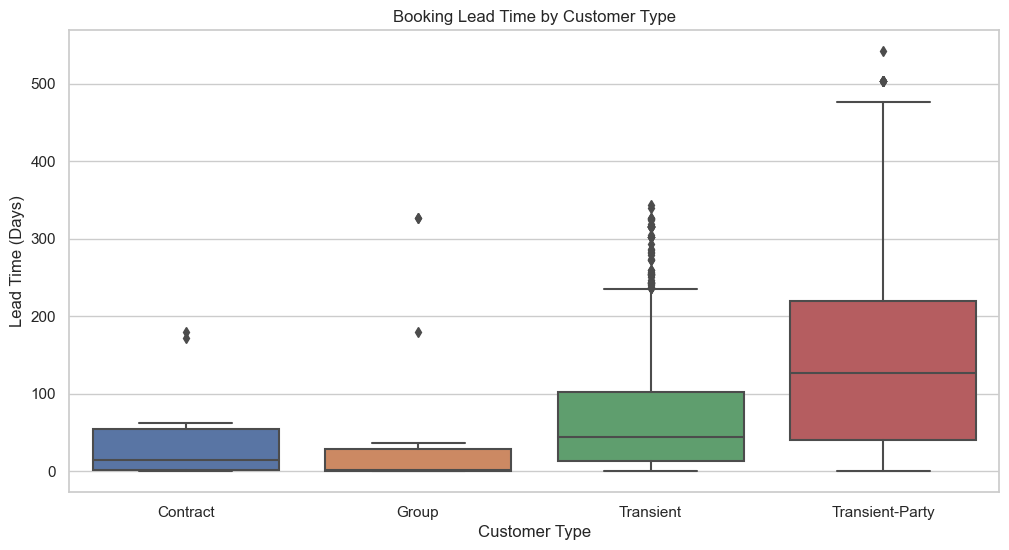

In [75]:
# Analyze lead time by customer type
plt.figure(figsize=(12, 6))
sns.boxplot(x='customer_type', y='lead_time', data=df)
plt.title('Booking Lead Time by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Lead Time (Days)')
plt.show()


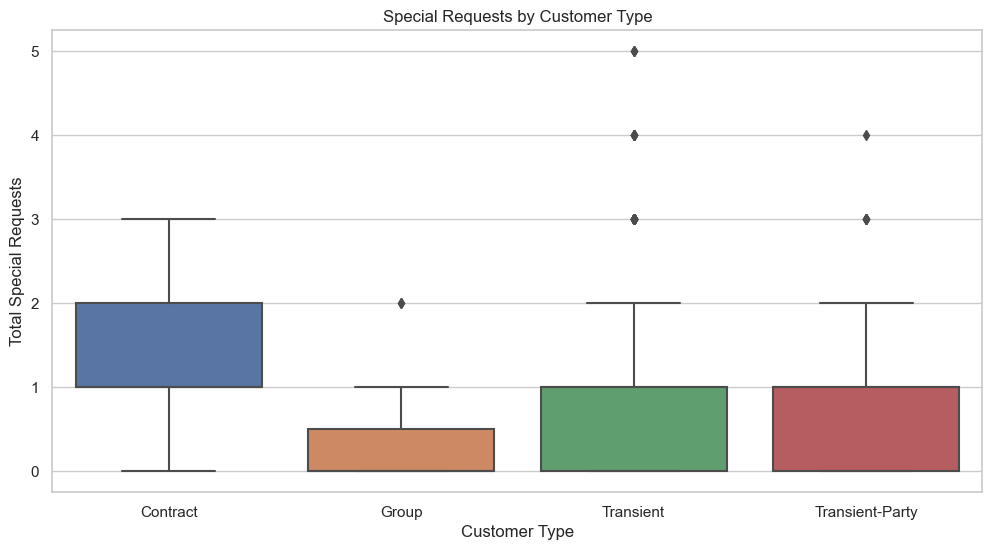

In [76]:
# Analyze special requests by customer type
plt.figure(figsize=(12, 6))
sns.boxplot(x='customer_type', y='total_of_special_requests', data=df)
plt.title('Special Requests by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Total Special Requests')
plt.show()


# TASK 5 : Revenue Management

In [77]:
#1.How does the Average Daily rate (ADR) vary over time.

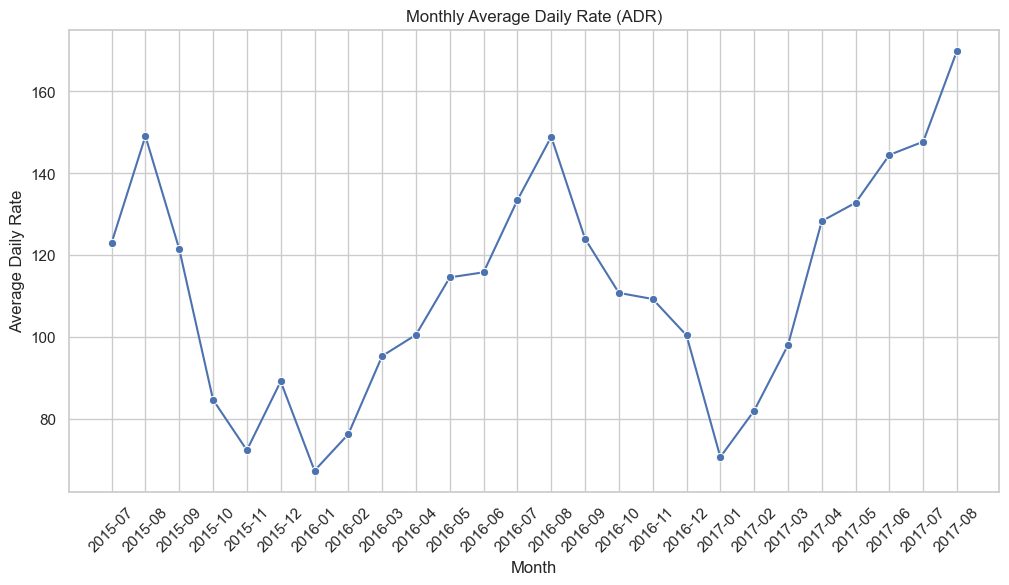

In [78]:
# Clean and preprocess data
df['adr'] = pd.to_numeric(df['adr'], errors='coerce')  # Convert ADR to numeric, handle errors
df.dropna(subset=['adr'], inplace=True)  # Remove rows with missing ADR values

# Convert arrival_date columns to datetime if not already done
df['arrival_date'] = pd.to_datetime(df[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']].astype(str).agg('-'.join, axis=1), format='%Y-%B-%d')

# Add additional time-related columns
df['arrival_month'] = df['arrival_date'].dt.to_period('M')  # Monthly period

# Monthly ADR
monthly_adr = df.groupby('arrival_month')['adr'].mean()

# Plot Monthly ADR
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_adr.index.astype(str), y=monthly_adr.values, marker='o')
plt.title('Monthly Average Daily Rate (ADR)')
plt.xlabel('Month')
plt.ylabel('Average Daily Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



In [79]:
#2.Can we identify pricing strategies that maximize revenue.

In [80]:

# Clean data
df['adr'] = pd.to_numeric(df['adr'], errors='coerce')
df['revenue'] = df['adr'] * (df['stays_in_weekend_nights'] + df['stays_in_week_nights'])
df.dropna(subset=['adr', 'revenue'], inplace=True)


In [81]:
# Calculate correlation matrix
correlation_matrix = df[['adr', 'revenue', 'lead_time', 'total_of_special_requests']].corr()

# Display correlation matrix
print(correlation_matrix)


                                adr   revenue  lead_time  \
adr                        1.000000  0.525462  -0.090323   
revenue                    0.525462  1.000000   0.070323   
lead_time                 -0.090323  0.070323   1.000000   
total_of_special_requests  0.114704  0.068890   0.120182   

                           total_of_special_requests  
adr                                         0.114704  
revenue                                     0.068890  
lead_time                                   0.120182  
total_of_special_requests                   1.000000  


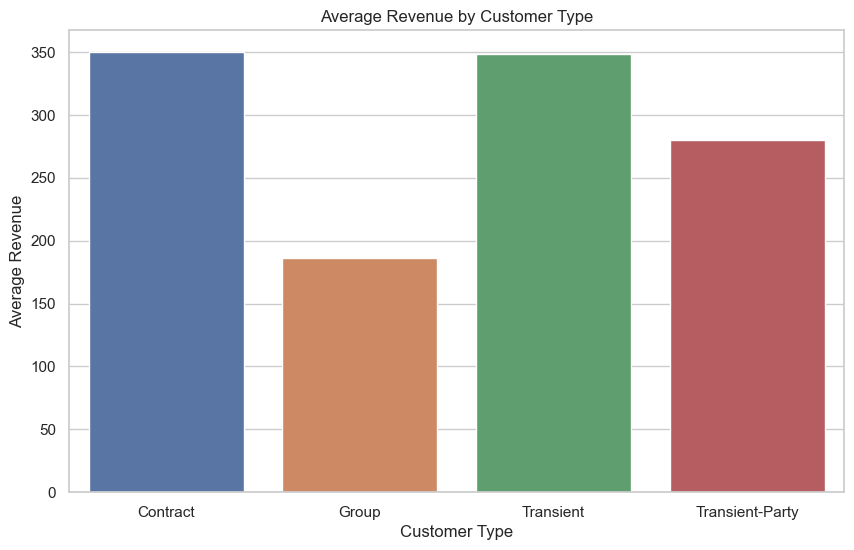

In [82]:
# Analyze revenue by customer type
revenue_by_customer_type = df.groupby('customer_type')['revenue'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_by_customer_type.index, y=revenue_by_customer_type.values)
plt.title('Average Revenue by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Average Revenue')
plt.show()


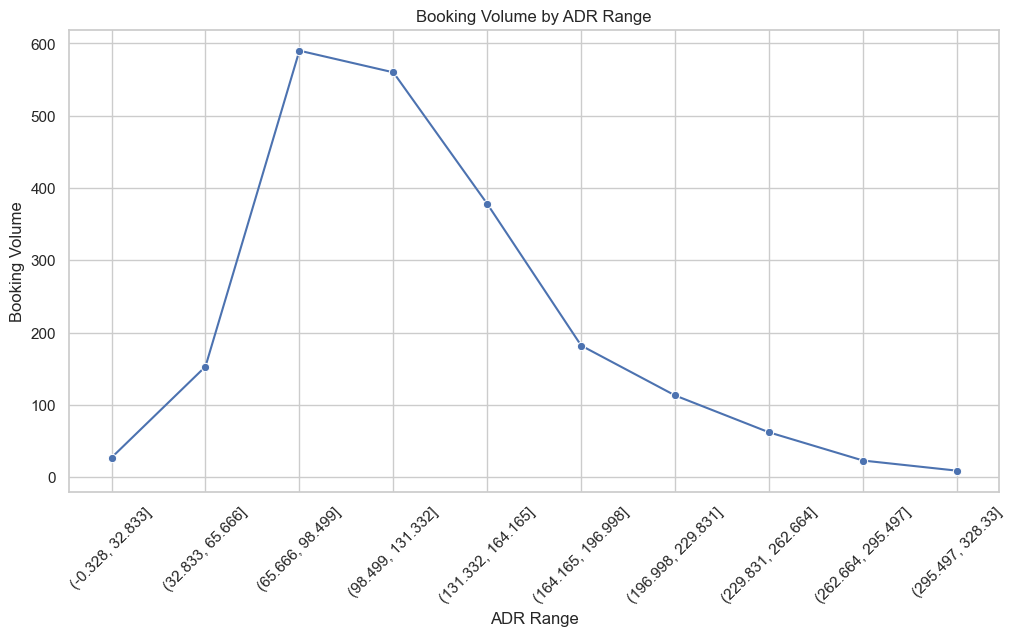

In [83]:
# Calculate average booking volume by ADR range
adr_bins = pd.cut(df['adr'], bins=10)
booking_volume_by_adr = df.groupby(adr_bins)['adr'].count()

# Plot booking volume by ADR range
plt.figure(figsize=(12, 6))
sns.lineplot(x=booking_volume_by_adr.index.astype(str), y=booking_volume_by_adr.values, marker='o')
plt.title('Booking Volume by ADR Range')
plt.xlabel('ADR Range')
plt.ylabel('Booking Volume')
plt.xticks(rotation=45)
plt.show()


In [84]:
import numpy as np
from scipy.optimize import minimize

# Define a function to calculate revenue
def revenue_function(adrs, booking_volume):
    return -np.sum(adrs * booking_volume)  # Negative for minimization

# Handle potential zero ADR values
small_value = 1e-6  # Small constant to avoid division by zero
df['adr'] = df['adr'].replace(0, small_value)

# Example ADR and booking volume data
adrs = df['adr'].values
booking_volume = 1 / (adrs ** 0.5 + small_value)  # Add small_value to prevent division by zero

# Minimize negative revenue (maximizing revenue)
result = minimize(revenue_function, x0=[adrs.mean()], args=(booking_volume,), bounds=[(0, None)])
optimal_adr = result.x[0]
print(f"Optimal ADR: {optimal_adr}")


Optimal ADR: 61127345.8412162


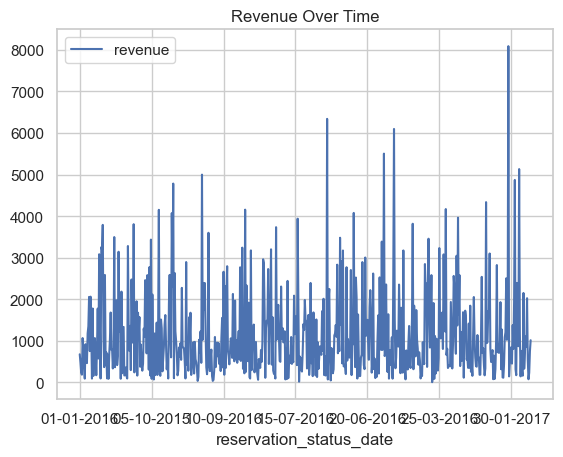

In [85]:
# Monitor revenue performance
performance_metrics = df[['reservation_status_date', 'adr', 'revenue']].groupby('reservation_status_date').sum()
performance_metrics.plot(y='revenue', title='Revenue Over Time')
plt.show()


In [86]:
#3.Are there specific room types associated with higher ADR

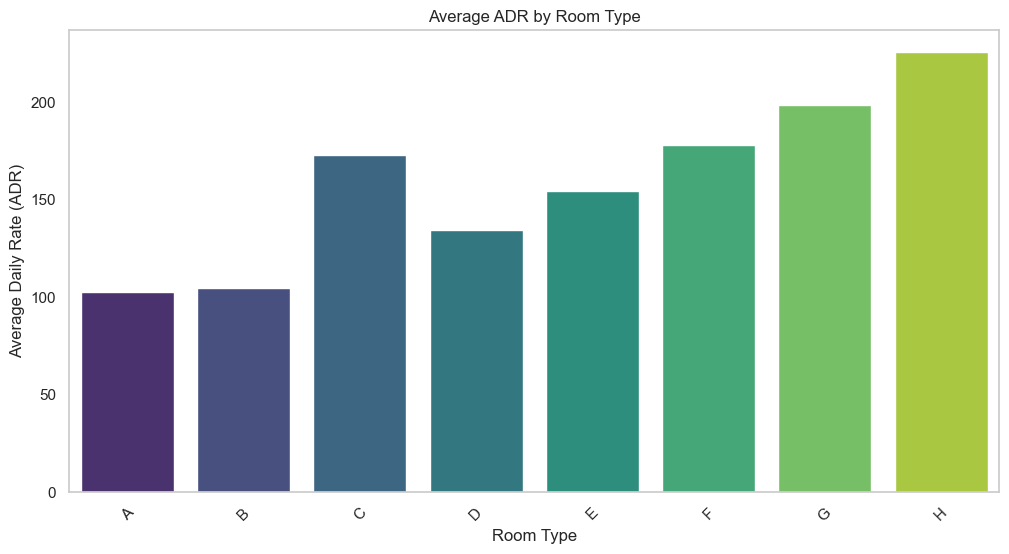

In [87]:
# Clean and preprocess data
df['adr'] = pd.to_numeric(df['adr'], errors='coerce')  # Ensure ADR is numeric
df['reserved_room_type'] = df['reserved_room_type'].astype('category')  # Ensure room type is categorical

# Calculate average ADR by room type
adr_by_room_type = df.groupby('reserved_room_type')['adr'].mean()

# Plot average ADR by room type
plt.figure(figsize=(12, 6))
sns.barplot(x=adr_by_room_type.index, y=adr_by_room_type.values, palette='viridis')
plt.title('Average ADR by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# TASK 6:Operational Efficiency

In [88]:
#1.What is the Effectiveness of different booking distribution channels.

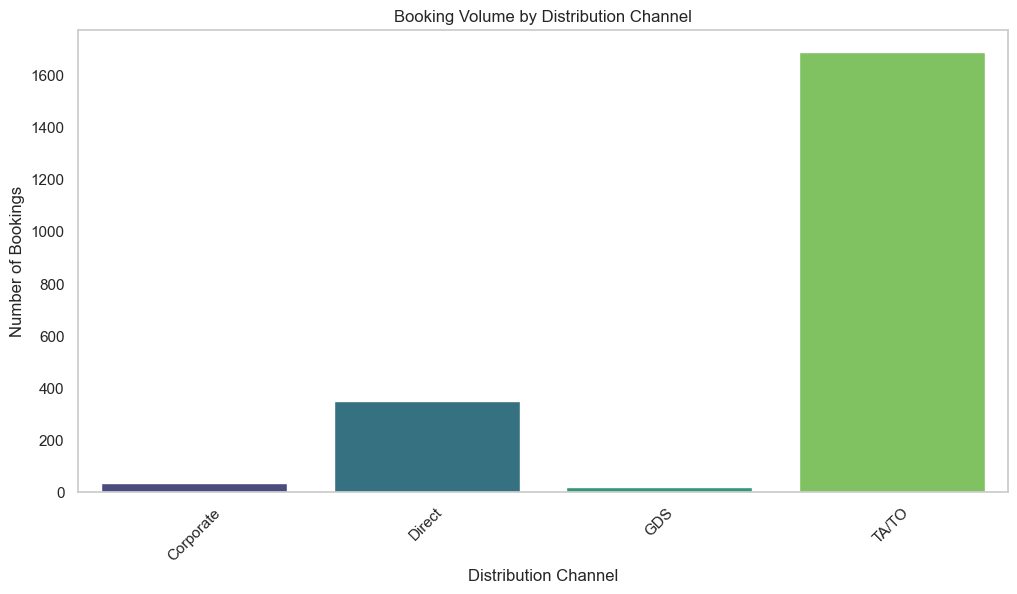

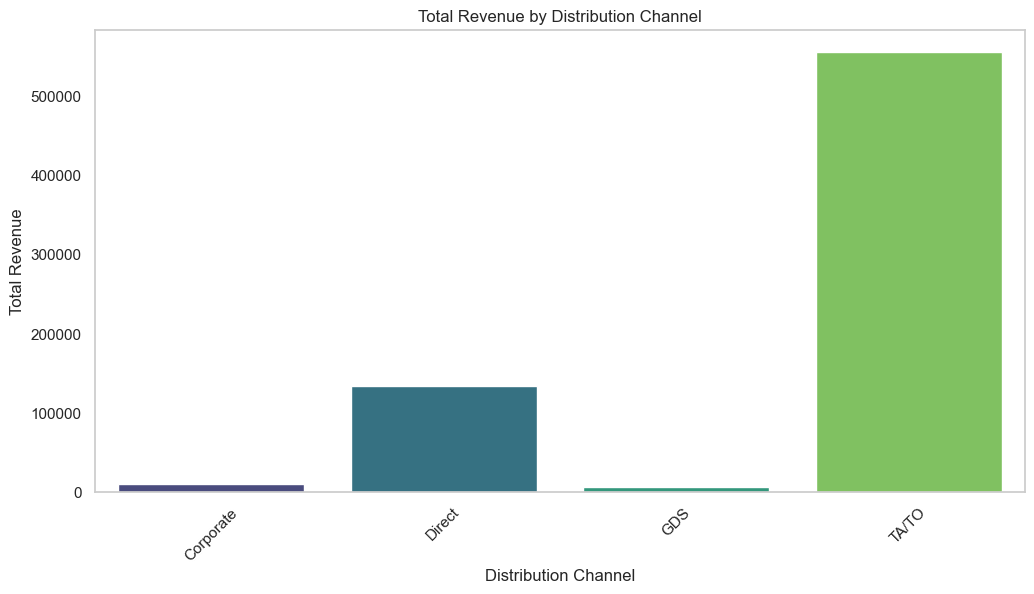

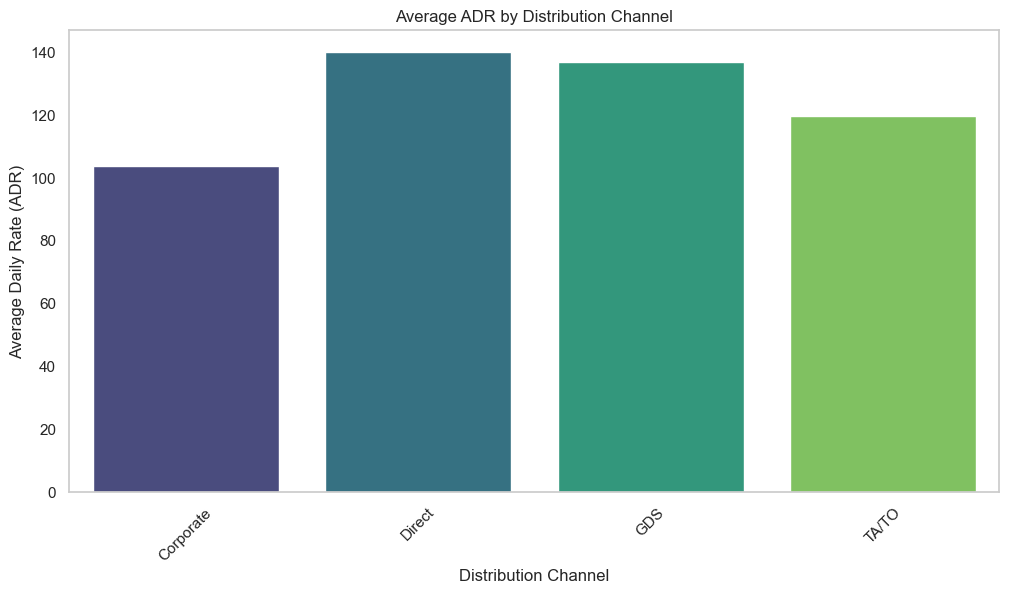

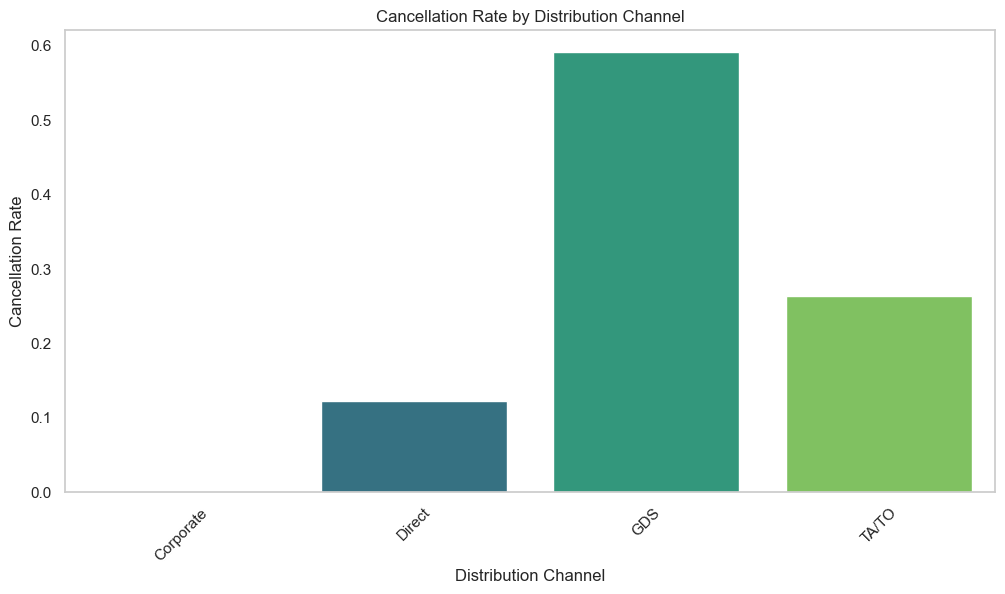

In [89]:
# Clean and preprocess data
df['adr'] = pd.to_numeric(df['adr'], errors='coerce')  # Ensure ADR is numeric
df['revenue'] = df['adr'] * (df['stays_in_weekend_nights'] + df['stays_in_week_nights'])  # Calculate revenue

# Group by distribution channel and calculate metrics
channel_performance = df.groupby('distribution_channel').agg(
    bookings=('adr', 'size'),
    total_revenue=('revenue', 'sum'),
    average_adr=('adr', 'mean'),
    cancellation_rate=('is_canceled', 'mean')
).reset_index()

# Plot metrics for each distribution channel

# Booking Volume
plt.figure(figsize=(12, 6))
sns.barplot(x='distribution_channel', y='bookings', data=channel_performance, palette='viridis')
plt.title('Booking Volume by Distribution Channel')
plt.xlabel('Distribution Channel')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Total Revenue
plt.figure(figsize=(12, 6))
sns.barplot(x='distribution_channel', y='total_revenue', data=channel_performance, palette='viridis')
plt.title('Total Revenue by Distribution Channel')
plt.xlabel('Distribution Channel')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Average ADR
plt.figure(figsize=(12, 6))
sns.barplot(x='distribution_channel', y='average_adr', data=channel_performance, palette='viridis')
plt.title('Average ADR by Distribution Channel')
plt.xlabel('Distribution Channel')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Cancellation Rate
plt.figure(figsize=(12, 6))
sns.barplot(x='distribution_channel', y='cancellation_rate', data=channel_performance, palette='viridis')
plt.title('Cancellation Rate by Distribution Channel')
plt.xlabel('Distribution Channel')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [90]:
#2.How do booking changes impact hotel operations.

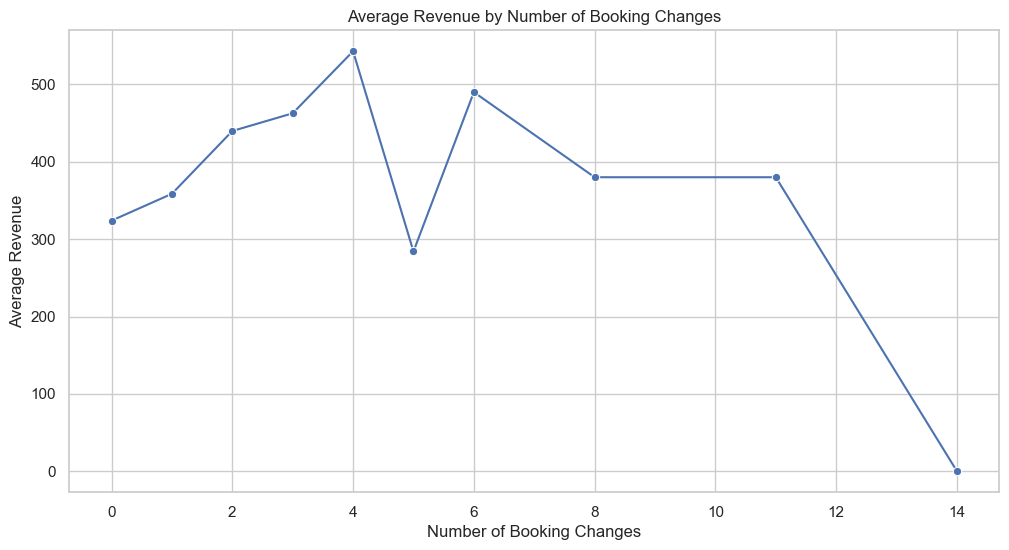

In [91]:
# Clean and preprocess data
df['booking_changes'] = pd.to_numeric(df['booking_changes'], errors='coerce')
df['adr'] = pd.to_numeric(df['adr'], errors='coerce')
df['revenue'] = df['adr'] * (df['stays_in_weekend_nights'] + df['stays_in_week_nights'])
df.dropna(subset=['booking_changes', 'revenue'], inplace=True)

# Analyze revenue by number of booking changes
revenue_by_changes = df.groupby('booking_changes')['revenue'].mean()

# Plot average revenue by booking changes
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(x=revenue_by_changes.index, y=revenue_by_changes.values, marker='o')
plt.title('Average Revenue by Number of Booking Changes')
plt.xlabel('Number of Booking Changes')
plt.ylabel('Average Revenue')
plt.grid(True)
plt.show()

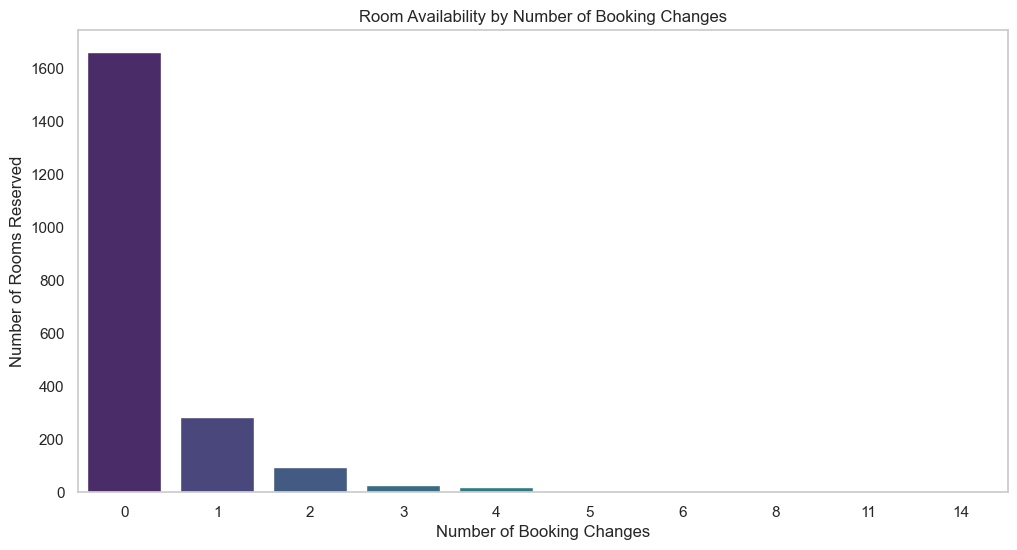

In [92]:
# Room availability impact
room_availability_by_changes = df.groupby('booking_changes')['reserved_room_type'].count()

# Plot room availability impact
plt.figure(figsize=(12, 6))
sns.barplot(x=room_availability_by_changes.index, y=room_availability_by_changes.values, palette='viridis')
plt.title('Room Availability by Number of Booking Changes')
plt.xlabel('Number of Booking Changes')
plt.ylabel('Number of Rooms Reserved')
plt.grid(axis='y')
plt.show()


In [93]:
#3.Is there a correlation between the duration a booking remains on waiting list and the likelihood of cancellation.

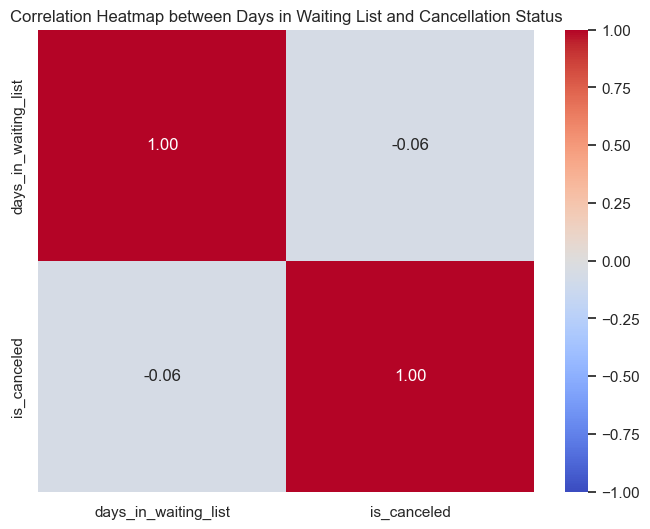

In [94]:
# Clean and preprocess data
df['days_in_waiting_list'] = pd.to_numeric(df['days_in_waiting_list'], errors='coerce')
df['is_canceled'] = df['is_canceled'].astype(int)  

# Drop rows with missing values in key columns
df.dropna(subset=['days_in_waiting_list', 'is_canceled'], inplace=True)

# Calculate correlation matrix
correlation_matrix = df[['days_in_waiting_list', 'is_canceled']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap between Days in Waiting List and Cancellation Status')
plt.show()


# TASK 7: Loyalty Programs and Repeat Business.

In [95]:
#1.What is the behavior of repeated guests with respect to their nature of stay.

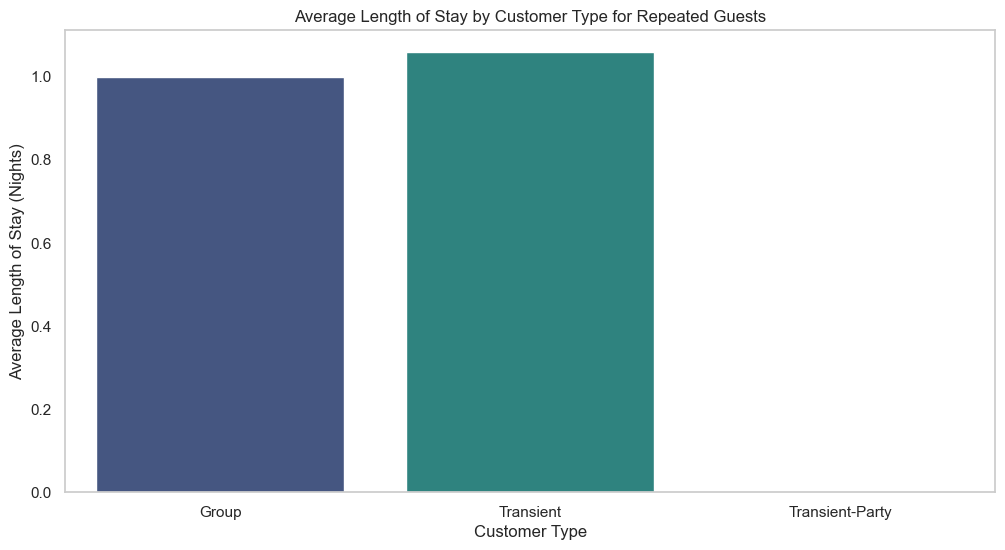

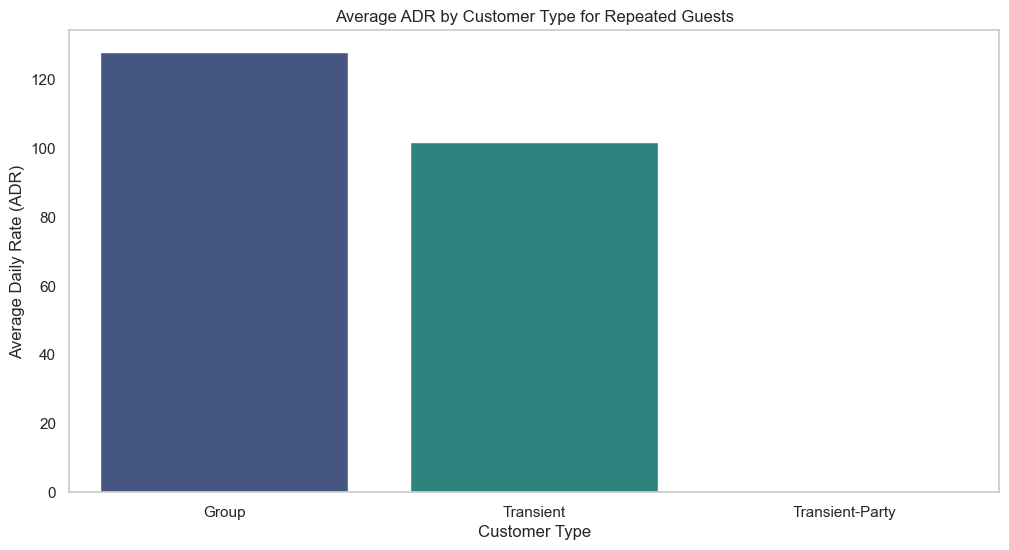

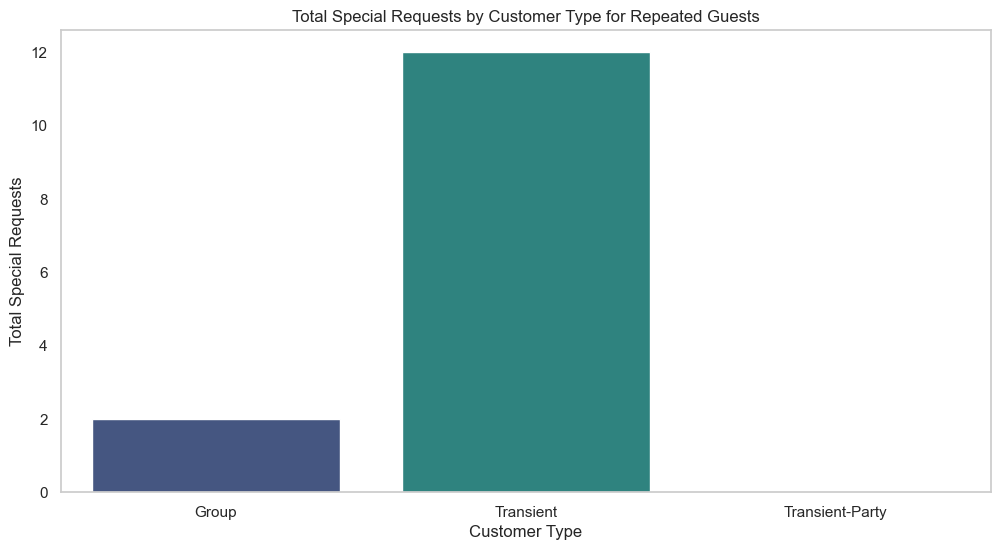

In [96]:

# Clean and preprocess data
df['is_repeated_guest'] = df['is_repeated_guest'].astype(int)  # Ensure repeated guest status is integer (0 or 1)
df['customer_type'] = df['customer_type'].astype(str)  # Ensure customer type is treated as string

# Filter data for repeated guests
repeated_guests = df[df['is_repeated_guest'] == 1]

# Analyze nature of stay for repeated guests
nature_of_stay_analysis = repeated_guests.groupby('customer_type').agg(
    average_length_of_stay=('stays_in_week_nights', 'mean'),
    average_adr=('adr', 'mean'),
    total_special_requests=('total_of_special_requests', 'sum')
).reset_index()

# Plot the average length of stay for repeated guests
plt.figure(figsize=(12, 6))
sns.barplot(x='customer_type', y='average_length_of_stay', data=nature_of_stay_analysis, palette='viridis')
plt.title('Average Length of Stay by Customer Type for Repeated Guests')
plt.xlabel('Customer Type')
plt.ylabel('Average Length of Stay (Nights)')
plt.grid(axis='y')
plt.show()

# Plot the average ADR for repeated guests
plt.figure(figsize=(12, 6))
sns.barplot(x='customer_type', y='average_adr', data=nature_of_stay_analysis, palette='viridis')
plt.title('Average ADR by Customer Type for Repeated Guests')
plt.xlabel('Customer Type')
plt.ylabel('Average Daily Rate (ADR)')
plt.grid(axis='y')
plt.show()

# Plot total special requests for repeated guests
plt.figure(figsize=(12, 6))
sns.barplot(x='customer_type', y='total_special_requests', data=nature_of_stay_analysis, palette='viridis')
plt.title('Total Special Requests by Customer Type for Repeated Guests')
plt.xlabel('Customer Type')
plt.ylabel('Total Special Requests')
plt.grid(axis='y')
plt.show()


In [97]:
#2.How does the success of loyalty programs relate to the accommodation of special requests from customers.

Pearson Correlation: -0.00323890352179827


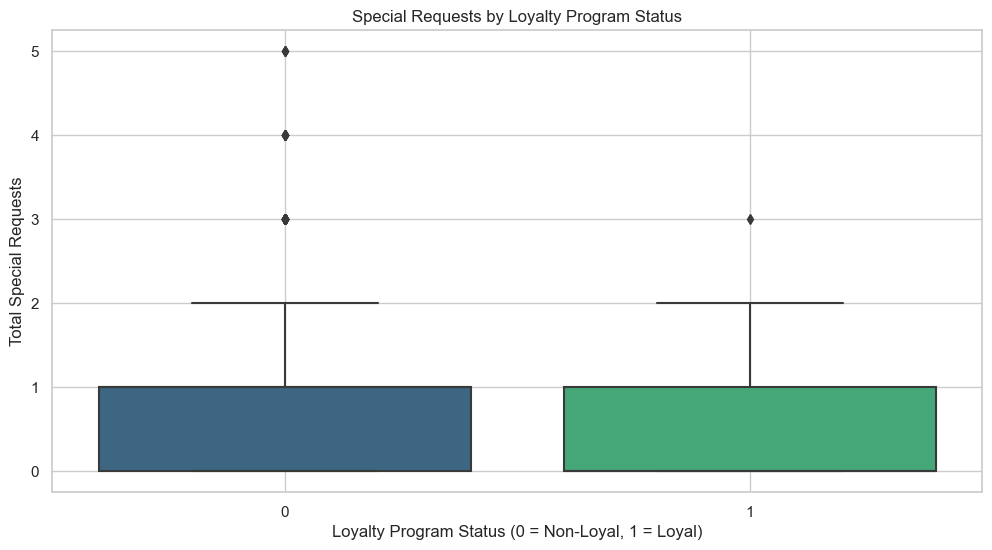

In [98]:
from scipy.stats import pearsonr

# Clean and preprocess data
df['is_repeated_guest'] = df['is_repeated_guest'].astype(int)  # Ensure repeated guest status is integer (0 or 1)
df['total_of_special_requests'] = pd.to_numeric(df['total_of_special_requests'], errors='coerce')

# Filter relevant columns
df_analysis = df[['is_repeated_guest', 'total_of_special_requests']].dropna()

# Calculate correlation
correlation, _ = pearsonr(df_analysis['is_repeated_guest'], df_analysis['total_of_special_requests'])
print(f'Pearson Correlation: {correlation}')

# Plot total special requests by loyalty program status
plt.figure(figsize=(12, 6))
sns.boxplot(x='is_repeated_guest', y='total_of_special_requests', data=df_analysis, palette='viridis')
plt.title('Special Requests by Loyalty Program Status')
plt.xlabel('Loyalty Program Status (0 = Non-Loyal, 1 = Loyal)')
plt.ylabel('Total Special Requests')
plt.grid(True)
plt.show()


In [99]:
#3.What factors contribute to repeat business? What is the distribution of lead time for repeated and non-repeated guests?

   is_repeated_guest  average_lead_time  average_adr  total_special_requests
0                  0          77.790183   123.221809                0.765159
1                  1          11.631579    97.885790                0.736842


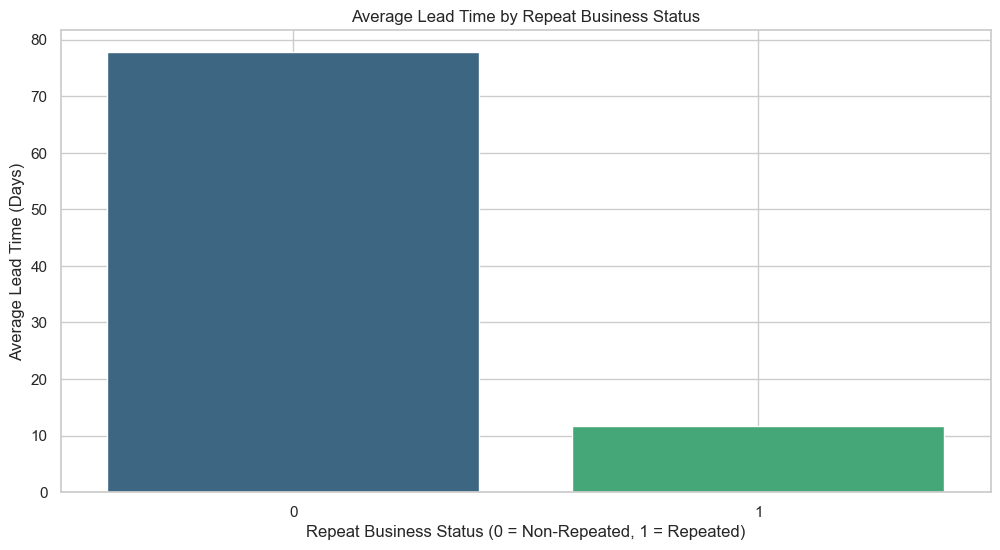

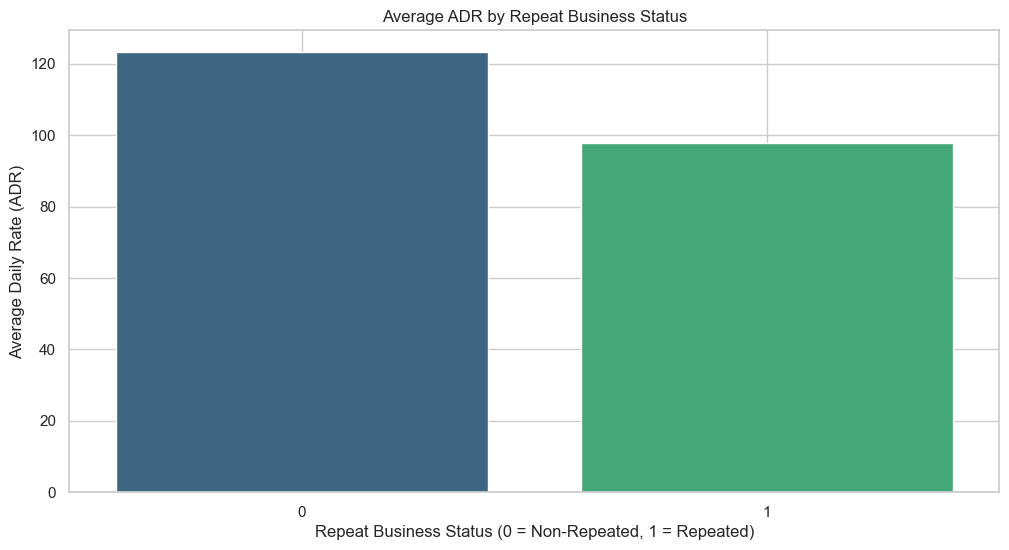

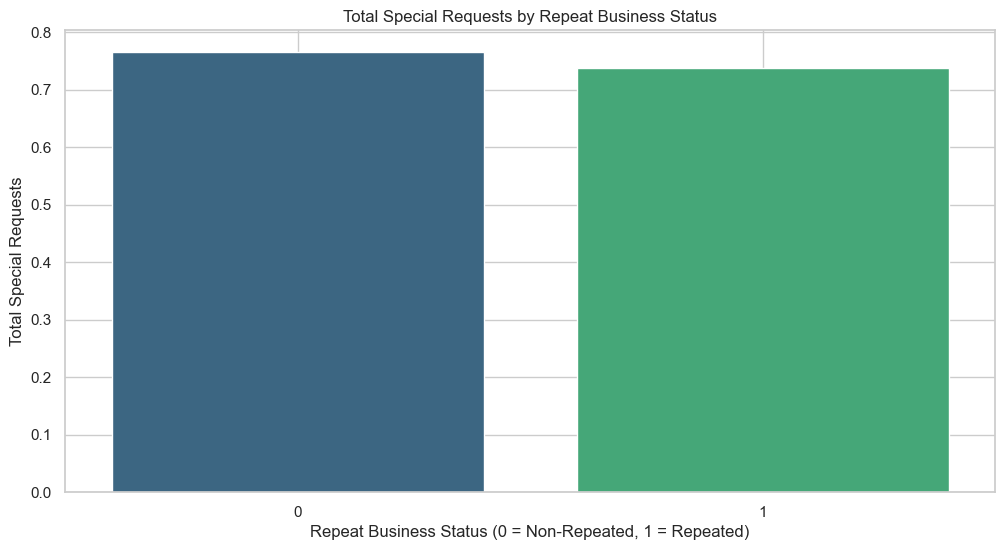

In [100]:

# Clean and preprocess data
df['is_repeated_guest'] = df['is_repeated_guest'].astype(int)  # Ensure repeated guest status is integer (0 or 1)
df['lead_time'] = pd.to_numeric(df['lead_time'], errors='coerce')
df['adr'] = pd.to_numeric(df['adr'], errors='coerce')
df['total_of_special_requests'] = pd.to_numeric(df['total_of_special_requests'], errors='coerce')

# Drop rows with missing values in key columns
df_clean = df.dropna(subset=['is_repeated_guest', 'lead_time', 'adr', 'total_of_special_requests'])

# Analyze factors for repeat business
repeat_analysis = df_clean.groupby('is_repeated_guest').agg(
    average_lead_time=('lead_time', 'mean'),
    average_adr=('adr', 'mean'),
    total_special_requests=('total_of_special_requests', 'mean')
).reset_index()

print(repeat_analysis)

# Visualize the average lead time for repeated vs non-repeated guests
plt.figure(figsize=(12, 6))
sns.barplot(x='is_repeated_guest', y='average_lead_time', data=repeat_analysis, palette='viridis')
plt.title('Average Lead Time by Repeat Business Status')
plt.xlabel('Repeat Business Status (0 = Non-Repeated, 1 = Repeated)')
plt.ylabel('Average Lead Time (Days)')
plt.grid(True)
plt.show()

# Visualize the average ADR for repeated vs non-repeated guests
plt.figure(figsize=(12, 6))
sns.barplot(x='is_repeated_guest', y='average_adr', data=repeat_analysis, palette='viridis')
plt.title('Average ADR by Repeat Business Status')
plt.xlabel('Repeat Business Status (0 = Non-Repeated, 1 = Repeated)')
plt.ylabel('Average Daily Rate (ADR)')
plt.grid(True)
plt.show()

# Visualize the average special requests for repeated vs non-repeated guests
plt.figure(figsize=(12, 6))
sns.barplot(x='is_repeated_guest', y='total_special_requests', data=repeat_analysis, palette='viridis')
plt.title('Total Special Requests by Repeat Business Status')
plt.xlabel('Repeat Business Status (0 = Non-Repeated, 1 = Repeated)')
plt.ylabel('Total Special Requests')
plt.grid(True)
plt.show()


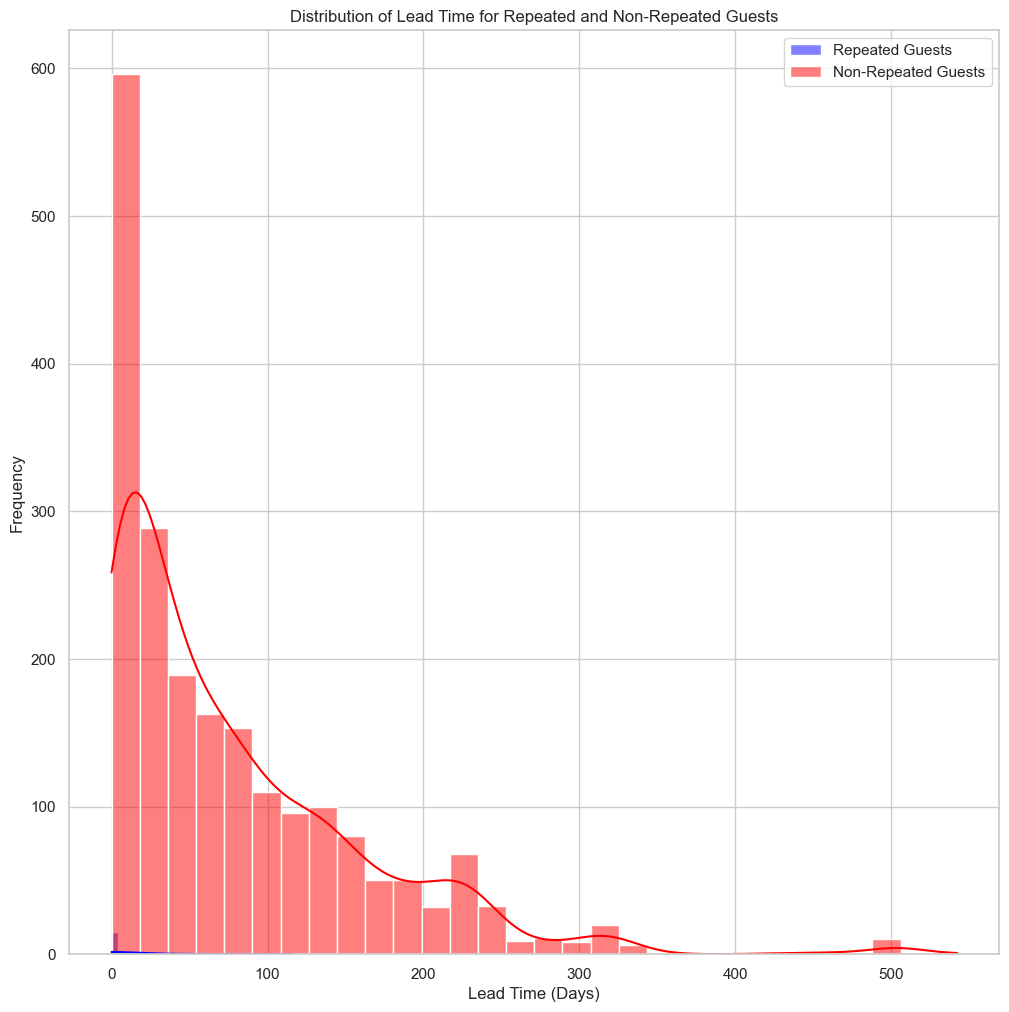

In [101]:
# Plot the distribution of lead time for repeated guests
plt.figure(figsize=(12, 12))
sns.histplot(df_clean[df_clean['is_repeated_guest'] == 1]['lead_time'], kde=True, color='blue', label='Repeated Guests', bins=30)
sns.histplot(df_clean[df_clean['is_repeated_guest'] == 0]['lead_time'], kde=True, color='red', label='Non-Repeated Guests', bins=30)
plt.title('Distribution of Lead Time for Repeated and Non-Repeated Guests')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()
